<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#LLCDS" data-toc-modified-id="LLCDS-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LLCDS</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Counts" data-toc-modified-id="Counts-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Counts</a></span></li><li><span><a href="#e-values" data-toc-modified-id="e-values-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>e-values</a></span></li></ul></li><li><span><a href="#Comparison-to-mmseqs2-taxonomy" data-toc-modified-id="Comparison-to-mmseqs2-taxonomy-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Comparison to mmseqs2 taxonomy</a></span></li></ul></li><li><span><a href="#LLCDS:-sensitive-diamond-mode" data-toc-modified-id="LLCDS:-sensitive-diamond-mode-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LLCDS: sensitive diamond mode</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Counts" data-toc-modified-id="Counts-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Counts</a></span></li></ul></li><li><span><a href="#Comparison-to-mmseqs2-taxonomy" data-toc-modified-id="Comparison-to-mmseqs2-taxonomy-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Comparison to mmseqs2 taxonomy</a></span></li></ul></li><li><span><a href="#LLCDS:-GTDB-w/-sensitive" data-toc-modified-id="LLCDS:-GTDB-w/-sensitive-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>LLCDS: GTDB w/ sensitive</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Counts" data-toc-modified-id="Counts-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Counts</a></span></li></ul></li><li><span><a href="#Comparison-to-mmseqs-taxonomy" data-toc-modified-id="Comparison-to-mmseqs-taxonomy-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Comparison to mmseqs taxonomy</a></span></li><li><span><a href="#Comparison-to-diamond-nr-taxonomy" data-toc-modified-id="Comparison-to-diamond-nr-taxonomy-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Comparison to diamond nr taxonomy</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Using diamond to get a taxonomy the clust50 rep sequences
  * Will compare this taxonomy versus the mmseqs-derived taxonomy

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/LLCDS/'

# clust50 rep sequences
clust_rep_seq_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/cluster/linclust/clusters_rep-seqs.faa'
## clust50 base dir
clust_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/metagenome',
                      'multi-study', 'BioProjects', 'merged', 'linclust50')

# params
threads = 16

# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [4]:
# misc
df.dims()
setDTthreads(threads)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/LLCDS/ 


# LLCDS

* Using pipeline for taxonomic classification of clust50 rep seqs
* Using diamond + nr database 

## Setup

In [14]:
pipeline_dir = '/ebio/abt3_projects/Georg_animal_feces/bin/llgene/'

In [15]:
config_file = file.path(work_dir, 'config.yaml')
cat_file(config_file)

#-- I/O --#
aa_seqs_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/cluster/linclust/clusters_rep-seqs.faa

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/LLCDS/

# samples file (if running "map" part of the pipeline
samples_file: Skip 

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog.db
## taxonomy
tax_dump: /ebio/abt3_projects/databases_no-backup/NCBI_taxonomy/2020-03-30/names.dmp
### mmseqs
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
### diamond
dmnd_tax_db: /ebio/abt3_projects/databases_no-backup/NCBI_diamond_db/nr.dmnd
## checkM
checkM_data: /ebio/a

## Run

```
screen -L -S llcds-ga-dmnd ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/LLCDS/config.yaml 30
```

## Summary

In [18]:
# reading in table
tax_file = file.path(work_dir, 'taxonomy', 'diamond_fast', 'taxonomy.tsv.gz')
cmd = glue::glue('gunzip -c {F}', F=tax_file)
dmnd_nr_tax = Fread(cmd=cmd, header=FALSE)
colnames(dmnd_nr_tax) = c ('query', 'taxID', 'evalue', 'taxonomy', 'taxIDs') 

## formatting
tax_levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
dmnd_nr_tax = dmnd_nr_tax %>%
    dt_mutate(taxonomy = ifelse(taxonomy == 'taxonomy', NA, taxonomy),
              taxIDs = ifelse(taxIDs == 'taxIDs', NA, taxIDs)) %>%
    dt_select(-taxIDs) %>%
    dt_separate(taxonomy, tax_levs, sep=';') 
dmnd_nr_tax

query                            taxID  evalue   Domain   Phylum    
1       519a3871f0204119b5b0496d48c663ff 0      0        NA       NA        
2       8a993417e0244af3b77663df645e20f4 0      0        NA       NA        
⋮       ⋮                                ⋮      ⋮        ⋮        ⋮         
6391860 a6ef773f95214f4481389bc84e474c4b 131567 4.4e-163                    
6391861 7375ad24b42d4ab5bd9bba2308402cf3 216851 1.1e-101 Bacteria Firmicutes
        Class      Order         Family          Genus            Species
1       NA         NA            NA              NA               NA     
2       NA         NA            NA              NA               NA     
⋮       ⋮          ⋮             ⋮               ⋮                ⋮      
6391860                                                           NA     
6391861 Clostridia Clostridiales Ruminococcaceae Faecalibacterium NA

In [20]:
# amount classified
tmp = dmnd_nr_tax %>% 
    dt_filter(!grepl('^uc_', Phylum),
              Phylum != 'unknown')
    
tmp %>% unique_n('No. of clusters', query)
tmp %>% unique_n('No. of Phyla', Phylum)
rm(tmp)

No. of unique No. of clusters: 3886058 
No. of unique No. of Phyla: 140 


In [22]:
# amount of microbial classified
to_keep = c('Archaea', 'Bacteria', 'Viruses')
tmp = dmnd_nr_tax %>% 
    dt_filter(Domain %in% to_keep,
              !grepl('^uc_', Phylum))
    
tmp %>% unique_n('No. of clusters', query)
tmp %>% unique_n('No. of Phyla', Phylum)
rm(tmp)

No. of unique No. of clusters: 3133536 
No. of unique No. of Phyla: 102 


### Counts

In [102]:
# number per domain
df.dims(20)
dmnd_nr_tax %>%
    dt_count(by=list(Domain))
df.dims()

Domain    N      
1 NA        2505803
2 Bacteria  3122429
3 Eukaryota  535777
4            216745
5 Viruses      7924
6 Archaea      3183

In [103]:
# number per domain
df.dims(20)
dmnd_nr_tax %>%
    dt_count(by=list(Domain, Phylum)) %>%
    dt_arrange(-N)
df.dims()

Domain    Phylum                     N      
1   NA        NA                         2505803
2   Bacteria  Proteobacteria             1878739
3   Eukaryota Chordata                    500526
4   Bacteria  Firmicutes                  404699
5   Bacteria                              373818
6   Bacteria  Bacteroidetes               249461
7                                         216745
8   Bacteria  Actinobacteria              103823
9   Bacteria  Fusobacteria                 86039
10  Eukaryota                              16898
⋮   ⋮         ⋮                          ⋮      
136 Bacteria  Candidatus Kryptonia       1      
137 Eukaryota Placozoa                   1      
138 Bacteria  Candidatus Wolfebacteria   1      
139 Eukaryota Foraminifera               1      
140 Bacteria  Candidatus Hydrogenedentes 1      
141 Bacteria  Candidatus Shapirobacteria 1      
142 Bacteria  Candidatus Levybacteria    1      
143 Bacteria  Candidatus Nomurabacteria  1      
144 Bacteria  Candidatus Hydrothermae    1      
145 Bacteria  Candidatus Dadabacteria    1

In [104]:
# is.na for Domain and/or Phylum 
df.dims(20)
dmnd_nr_tax %>%
    dt_filter(is.na(Domain) | is.na(Phylum) | Domain == '' | Phylum == '') %>%
    dt_count() 

dmnd_nr_tax %>%
    dt_filter(is.na(Domain) | is.na(Phylum) | Domain == '' | Phylum == '') %>%
    dt_count(by=list(Domain, Phylum)) %>%
    dt_arrange(-N)
df.dims()

N      
1 3121259

Domain    Phylum N      
1 NA        NA     2505803
2 Bacteria          373818
3                   216745
4 Eukaryota          16898
5 Viruses             7924
6 Archaea               71

In [105]:
# candidatus phyla
df.dims(20)
dmnd_nr_tax %>%
    dt_filter(grepl('[Cc]andidatus', Phylum)) %>%
    dt_count(by=list(Domain, Phylum)) %>%
    dt_arrange(-N)
df.dims()

Domain   Phylum                         N  
1  Bacteria Candidatus Melainabacteria     567
2  Bacteria Candidatus Saccharibacteria    490
3  Bacteria Candidatus Yanofskybacteria    109
4  Bacteria Candidatus Marinimicrobia       22
5  Archaea  Candidatus Bathyarchaeota       19
6  Bacteria Candidatus Margulisbacteria     18
7  Archaea  Candidatus Thorarchaeota        18
8  Bacteria Candidatus Cloacimonetes        16
9  Bacteria Candidatus Parcubacteria        15
10 Bacteria Candidatus Fermentibacteria     14
⋮  ⋮        ⋮                              ⋮  
54 Archaea  Candidatus Verstraetearchaeota 1  
55 Bacteria Candidatus Sumerlaeota         1  
56 Bacteria Candidatus Kryptonia           1  
57 Bacteria Candidatus Wolfebacteria       1  
58 Bacteria Candidatus Hydrogenedentes     1  
59 Bacteria Candidatus Shapirobacteria     1  
60 Bacteria Candidatus Levybacteria        1  
61 Bacteria Candidatus Nomurabacteria      1  
62 Bacteria Candidatus Hydrothermae        1  
63 Bacteria Candidatus Dadabacteria        1

### e-values

In [106]:
dmnd_nr_tax_f = dmnd_nr_tax %>%
    dt_filter(!is.na(Domain) & !is.na(Phylum) &  Domain != '' & Phylum != '') 

dmnd_nr_tax_f %>% summary_x('e-value', evalue)
dmnd_nr_tax_f

Min. 1st Qu. Median Mean         3rd Qu. Max.  sd sd_err_of_mean
e-value 0    8.8e-88 5e-47  3.709644e-08 1.8e-28 1e-05 0  0

query                            taxID  evalue   Domain   
1       186964524ed64aa9a1c5f88f4819c8a2 186634 1.1e-19  Eukaryota
2       fee92ba1bb764d09a608d84b377a7a21    657 2.8e-94  Bacteria 
⋮       ⋮                                ⋮      ⋮        ⋮        
3270601 ecdbd181282140ccb8307cb2fc8afc89    815  4.1e-49 Bacteria 
3270602 7375ad24b42d4ab5bd9bba2308402cf3 216851 1.1e-101 Bacteria 
        Phylum         Class               Order         Family         
1       Chordata       Actinopteri                                      
2       Proteobacteria Gammaproteobacteria Vibrionales   Vibrionaceae   
⋮       ⋮              ⋮                   ⋮             ⋮              
3270601 Bacteroidetes  Bacteroidia         Bacteroidales Bacteroidaceae 
3270602 Firmicutes     Clostridia          Clostridiales Ruminococcaceae
        Genus            Species
1                        NA     
2       Photobacterium   NA     
⋮       ⋮                ⋮      
3270601                  NA     
3270602 Faecalibacterium NA

In [107]:
df.dims(20)
dmnd_nr_tax_f_s = dmnd_nr_tax_f %>%
    dt_mutate(evalue = ifelse(evalue == 0, 1e-90, evalue)) %>%
    dt_summarize(N = length(evalue),
                 mean_evalue = mean(evalue, na.rm=TRUE),
                 sd_evalue = sd(evalue, na.rm=TRUE),
                 by=list(Domain, Phylum)) %>%
    dt_arrange(-N)
dmnd_nr_tax_f_s
df.dims()

Domain    Phylum                     N       mean_evalue  sd_evalue   
1   Bacteria  Proteobacteria             1878739 1.156606e-08 2.430466e-07
2   Eukaryota Chordata                    500526 1.004465e-07 7.074628e-07
3   Bacteria  Firmicutes                  404699 4.908095e-08 4.983698e-07
4   Bacteria  Bacteroidetes               249461 5.108434e-08 5.015288e-07
5   Bacteria  Actinobacteria              103823 2.463017e-08 3.495402e-07
6   Bacteria  Fusobacteria                 86039 5.866783e-08 5.381600e-07
7   Bacteria  Tenericutes                   9525 1.891870e-07 9.502728e-07
8   Bacteria  Spirochaetes                  8351 9.869309e-08 7.090025e-07
9   Eukaryota Streptophyta                  6715 1.740582e-07 9.332348e-07
10  Archaea   Euryarchaeota                 3049 8.154948e-08 6.724400e-07
⋮   ⋮         ⋮                          ⋮       ⋮            ⋮           
130 Bacteria  Candidatus Kryptonia       1       8.0e-06      NA          
131 Eukaryota Placozoa                   1       2.0e-08      NA          
132 Bacteria  Candidatus Wolfebacteria   1       1.0e-07      NA          
133 Eukaryota Foraminifera               1       6.2e-06      NA          
134 Bacteria  Candidatus Hydrogenedentes 1       2.5e-12      NA          
135 Bacteria  Candidatus Shapirobacteria 1       2.9e-11      NA          
136 Bacteria  Candidatus Levybacteria    1       3.3e-19      NA          
137 Bacteria  Candidatus Nomurabacteria  1       3.5e-12      NA          
138 Bacteria  Candidatus Hydrothermae    1       9.9e-06      NA          
139 Bacteria  Candidatus Dadabacteria    1       4.2e-15      NA

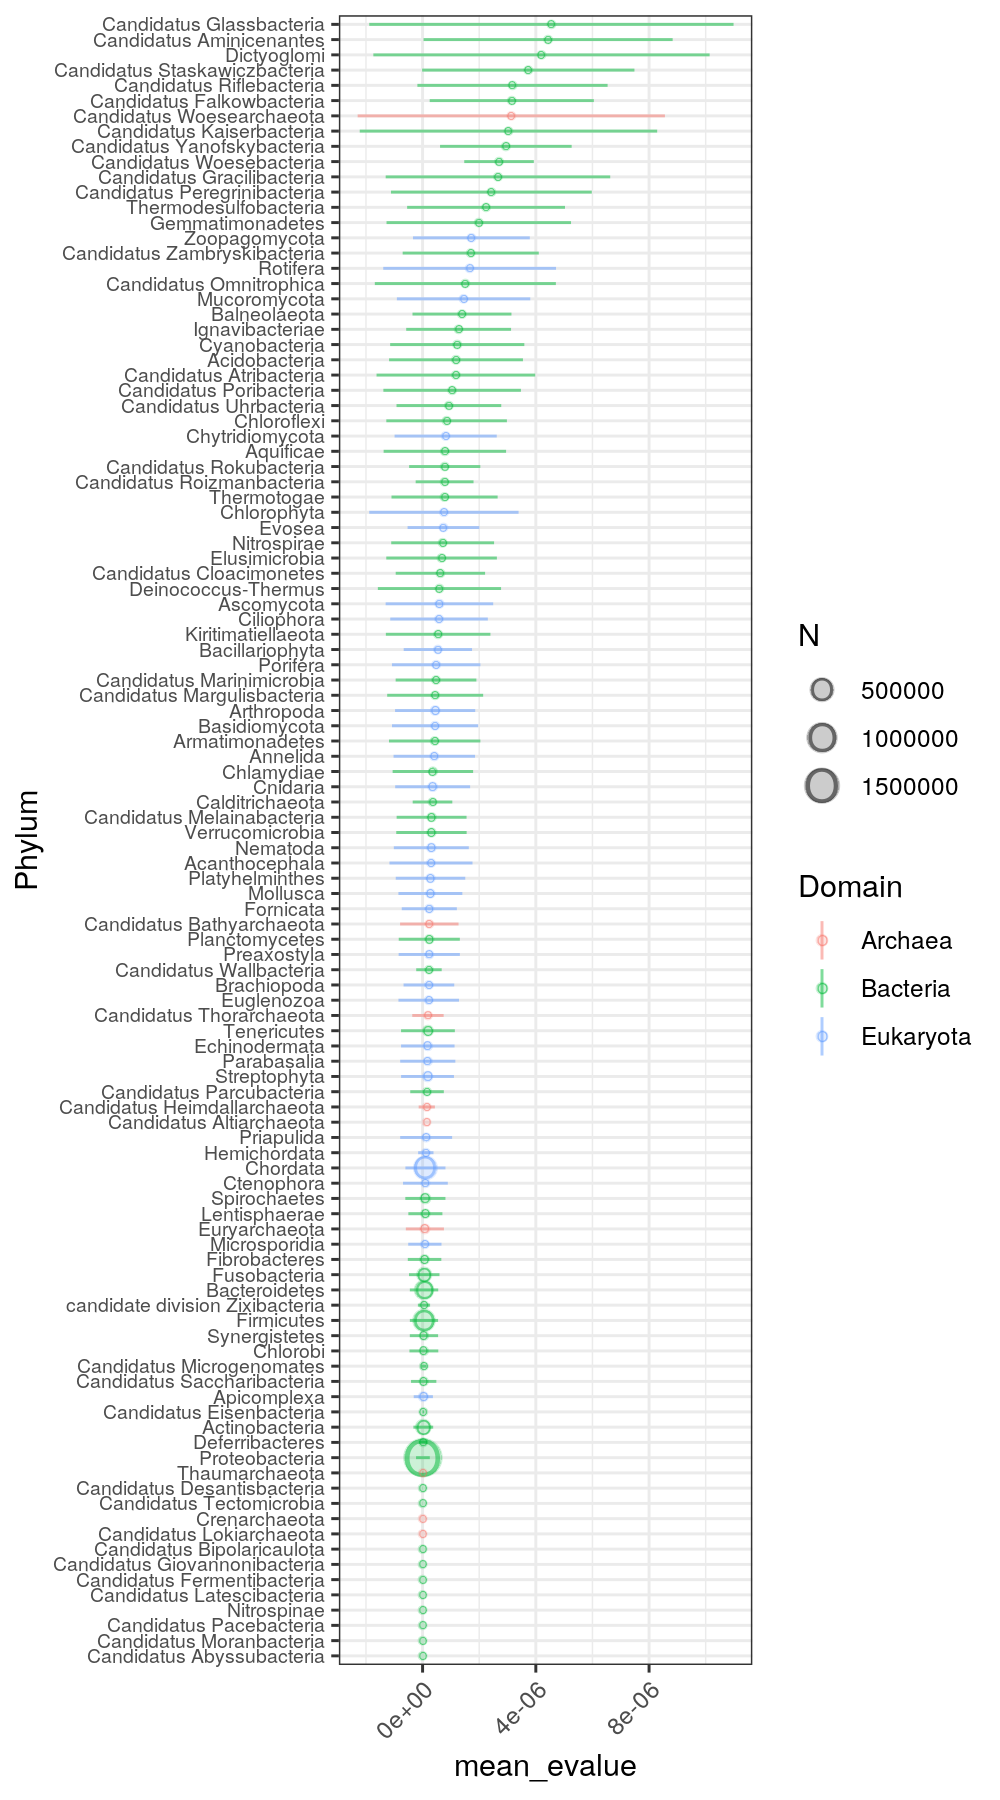

In [108]:
# plotting evalue distribution per phylum
p = dmnd_nr_tax_f_s %>%
    dt_filter(N > 1) %>%
    dt_mutate(Phylum = Phylum %>% reorder(mean_evalue)) %>%
    ggplot(aes(Phylum, mean_evalue, size=N, color=Domain)) +
    geom_linerange(aes(ymin=mean_evalue - sd_evalue,
                       ymax=mean_evalue + sd_evalue), alpha=0.5, size=0.5) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(5,9)
plot(p)

## Comparison to mmseqs2 taxonomy

In [5]:
# reading in taxonomy table
## WARING: slow
F = file.path(clust_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
#cmd = glue::glue('gunzip -c {file} | head -n 100000', file=F) 
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'X')
mmseqs_tax = fread(cmd=cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    dt_separate(lineage, into=levs, sep=':') %>%
    #dt_filter(!is.na(Domain), !is.na(Phylum)) %>%
    dt_select(-X, -taxID, -rank, -spp) %>%
    dt_rename(seqid = seqID)
mmseqs_tax

seqid                            Domain   Kingdom Phylum        
1       4f509c5351da4782bcba565a798e69da Bacteria unknown Proteobacteria
2       07de412a5c5743c7aec282ab947ff2a7 Bacteria unknown Proteobacteria
⋮       ⋮                                ⋮        ⋮       ⋮             
6391860 2497ac9df6f64aa9bcfea20fd97f7dcc Bacteria unknown Firmicutes    
6391861 4d0d134bb11449dead905e4a4049f5a3 NA       NA      NA            
        Class                 Order             Family             Genus       
1       Betaproteobacteria    Neisseriales      Chromobacteriaceae Microvirgula
2       Epsilonproteobacteria Campylobacterales Helicobacteraceae  Helicobacter
⋮       ⋮                     ⋮                 ⋮                  ⋮           
6391860 Clostridia            Clostridiales     Lachnospiraceae    Oribacterium
6391861 NA                    NA                NA                 NA          
        Species                        
1       Microvirgula aerodenitrificans 
2       Helicobacter hepaticus         
⋮       ⋮                              
6391860 Oribacterium sp. oral taxon 078
6391861 NA

In [15]:
# amount classified
tmp = mmseqs_tax %>% 
    dt_filter(!grepl('^uc_', Phylum),
              Phylum != 'unknown')
    
tmp %>% unique_n('No. of clusters', seqid)
tmp %>% unique_n('No. of Phyla', Phylum)
rm(tmp)

No. of unique No. of clusters: 3708441 
No. of unique No. of Phyla: 194 


In [16]:
# amount of microbial classified
to_keep = c('Archaea', 'Bacteria', 'Viruses')
tmp = mmseqs_tax %>% 
    dt_filter(Domain %in% to_keep,
              !grepl('^uc_', Phylum))
    
tmp %>% unique_n('No. of clusters', seqid)
tmp %>% unique_n('No. of Phyla', Phylum)
rm(tmp)

No. of unique No. of clusters: 3079918 
No. of unique No. of Phyla: 157 


In [147]:
# checking key overlap
overlap(mmseqs_tax, dmnd_nr_tax, seqid, query)

intersect(x,y): 6391861 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 6391861 


In [148]:
# joining
mmseqs_tax = mmseqs_tax %>%
    dt_inner_join(dmnd_nr_tax %>% dt_rename('seqid'=query),
                  by=c('seqid'))

mmseqs_tax

seqid                            Domain    Kingdom Phylum    
1       519a3871f0204119b5b0496d48c663ff NA        NA      NA        
2       8a993417e0244af3b77663df645e20f4 NA        NA      NA        
⋮       ⋮                                ⋮         ⋮       ⋮         
6391860 a6ef773f95214f4481389bc84e474c4b Eukaryota Metazoa Nematoda  
6391861 7375ad24b42d4ab5bd9bba2308402cf3 Bacteria  unknown Firmicutes
        Class      Order         Family          Genus           
1       NA         NA            NA              NA              
2       NA         NA            NA              NA              
⋮       ⋮          ⋮             ⋮               ⋮               
6391860 Enoplea    Trichinellida Trichuridae     Trichuris       
6391861 Clostridia Clostridiales Ruminococcaceae Faecalibacterium
        Species                      taxID  evalue   i.Domain i.Phylum  
1       NA                           0      0        NA       NA        
2       NA                           0      0        NA       NA        
⋮       ⋮                            ⋮      ⋮        ⋮        ⋮         
6391860 Trichuris trichiura          131567 4.4e-163                    
6391861 Faecalibacterium prausnitzii 216851 1.1e-101 Bacteria Firmicutes
        i.Class    i.Order       i.Family        i.Genus          i.Species
1       NA         NA            NA              NA               NA       
2       NA         NA            NA              NA               NA       
⋮       ⋮          ⋮             ⋮               ⋮                ⋮        
6391860                                                           NA       
6391861 Clostridia Clostridiales Ruminococcaceae Faecalibacterium NA

In [149]:
# checking overlap
mmseqs_tax_s = mmseqs_tax %>%
    dt_mutate(same_phylum = (Domain == i.Domain & Phylum == i.Phylum)) %>%
    dt_count(by=list(same_phylum)) 

mmseqs_tax_s

same_phylum N      
1    NA       2763835
2 FALSE        796380
3  TRUE       2831646

In [162]:
# summarizing by mmseqs taxonomy
mmseqs_tax_s = mmseqs_tax %>%
    dt_mutate(same_phylum = (Domain == i.Domain & Phylum == i.Phylum)) %>%
    dt_count(by=list(same_phylum, Domain, Phylum)) 

mmseqs_tax_s

same_phylum Domain   Phylum                    N      
1      NA       NA       NA                        2629072
2   FALSE       Bacteria Proteobacteria             163472
⋮   ⋮           ⋮        ⋮                         ⋮      
465   NA        Archaea  Nanoarchaeota             1      
466 TRUE        Bacteria Candidatus Nomurabacteria 1

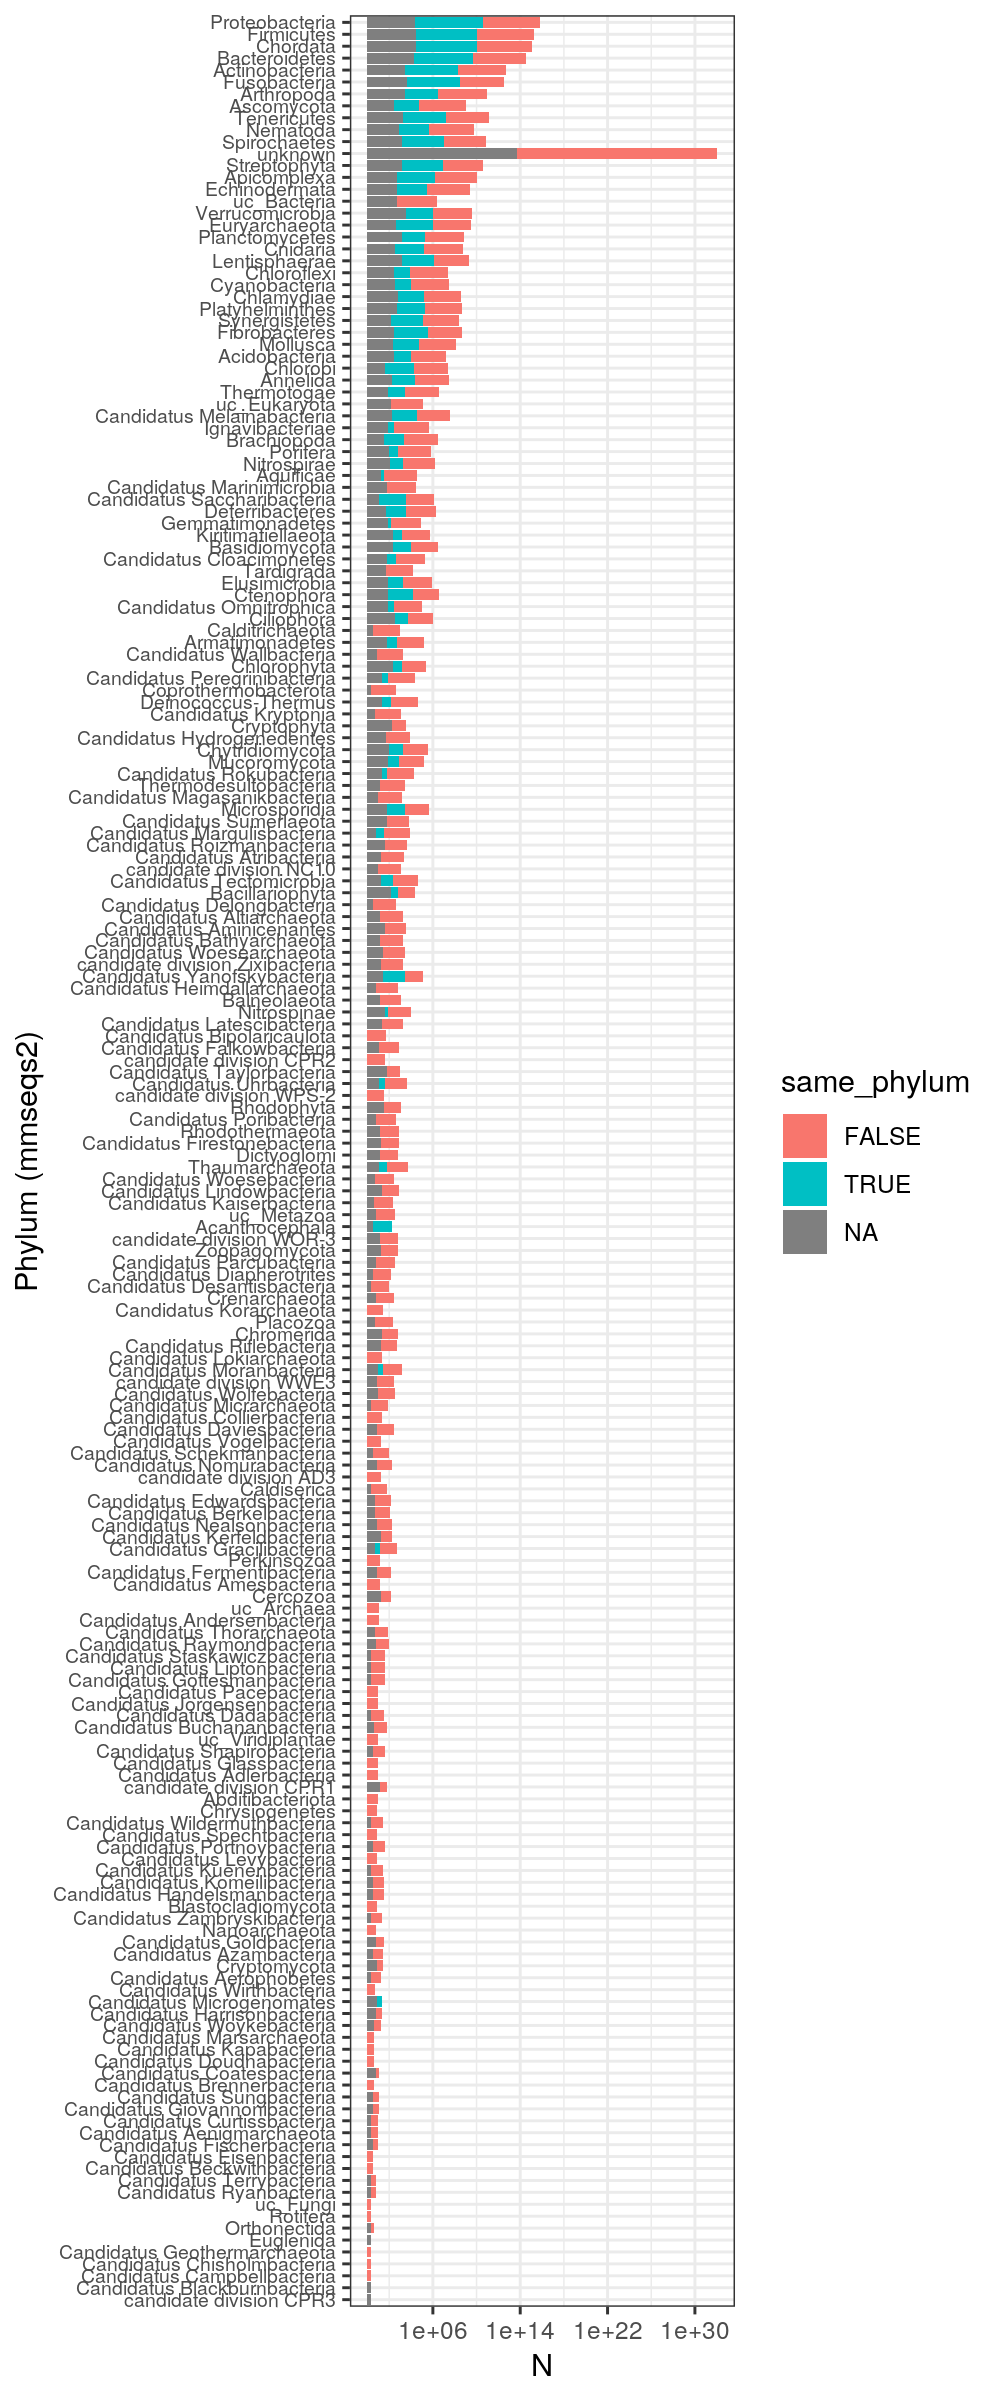

In [163]:
# plotting overlap (mmseqs taxonomy)
p = mmseqs_tax_s %>%
    dt_filter(N > 1,
              !is.na(Phylum),
              Phylum != '') %>%
    dt_mutate(Phylum = Phylum %>% reorder(N)) %>%
    ggplot(aes(Phylum, N, fill=same_phylum)) +
    geom_bar(stat='identity') +
    labs(x='Phylum (mmseqs2)', y='No. of clusters') +
    scale_y_log10() +
    scale_fill_discrete('Same phylum?') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    ) +
    coord_flip()

p.dims(5,12)
plot(p)

In [165]:
# summarizing taxonomy (by diamond)
mmseqs_tax_s = mmseqs_tax %>%
    dt_mutate(same_phylum = (Domain == i.Domain & Phylum == i.Phylum)) %>%
    dt_count(by=list(same_phylum, i.Domain, i.Phylum)) 

mmseqs_tax_s

same_phylum i.Domain i.Phylum                N      
1      NA       NA       NA                      2505803
2   FALSE       Bacteria                          351894
⋮   ⋮           ⋮        ⋮                       ⋮      
287 FALSE       Bacteria Candidatus Hydrothermae 1      
288 FALSE       Bacteria Candidatus Dadabacteria 1

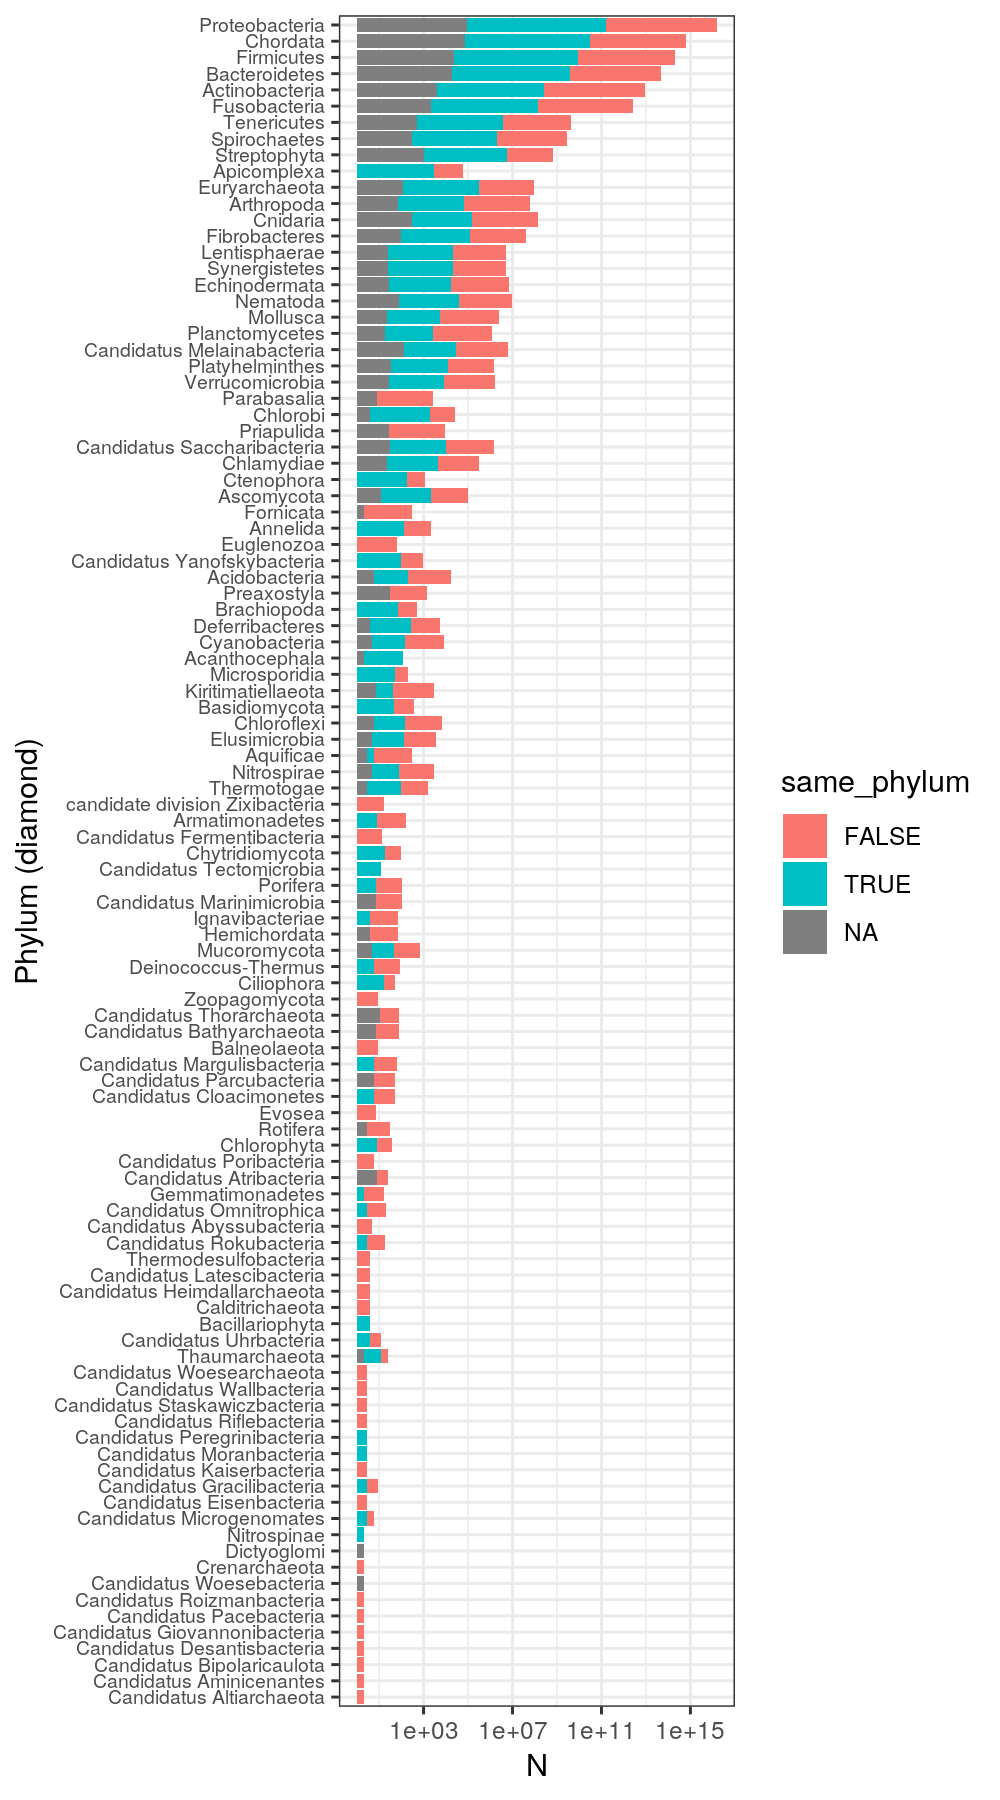

In [172]:
# plotting overlap
p = mmseqs_tax_s %>%
    dt_filter(N > 1,
              !is.na(i.Phylum),
              i.Phylum != '') %>%
    dt_mutate(i.Phylum = i.Phylum %>% reorder(N)) %>%
    ggplot(aes(i.Phylum, N, fill=same_phylum)) +
    geom_bar(stat='identity') +
    labs(x='Phylum (diamond)') +
    scale_fill_discrete('Same phylum?') +
    scale_y_log10() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    ) +
    coord_flip()

p.dims(5,9)
plot(p)

In [173]:
# summarizing by both taxonomies
mmseqs_tax_s = mmseqs_tax %>%
    dt_mutate(same_phylum = (Domain == i.Domain & Phylum == i.Phylum)) %>%
    dt_count(by=list(same_phylum, Domain, Phylum, i.Domain, i.Phylum)) 

mmseqs_tax_s

same_phylum Domain   Phylum                    i.Domain
1       NA       NA       NA                        NA      
2    FALSE       Bacteria Proteobacteria            Bacteria
⋮    ⋮           ⋮        ⋮                         ⋮       
2331 FALSE       Bacteria Candidatus Falkowbacteria Bacteria
2332 FALSE       Bacteria Candidatus Ryanbacteria   Bacteria
     i.Phylum                   N      
1    NA                         2371040
2                                 77548
⋮    ⋮                          ⋮      
2331 Candidatus Melainabacteria 1      
2332 Cyanobacteria              1

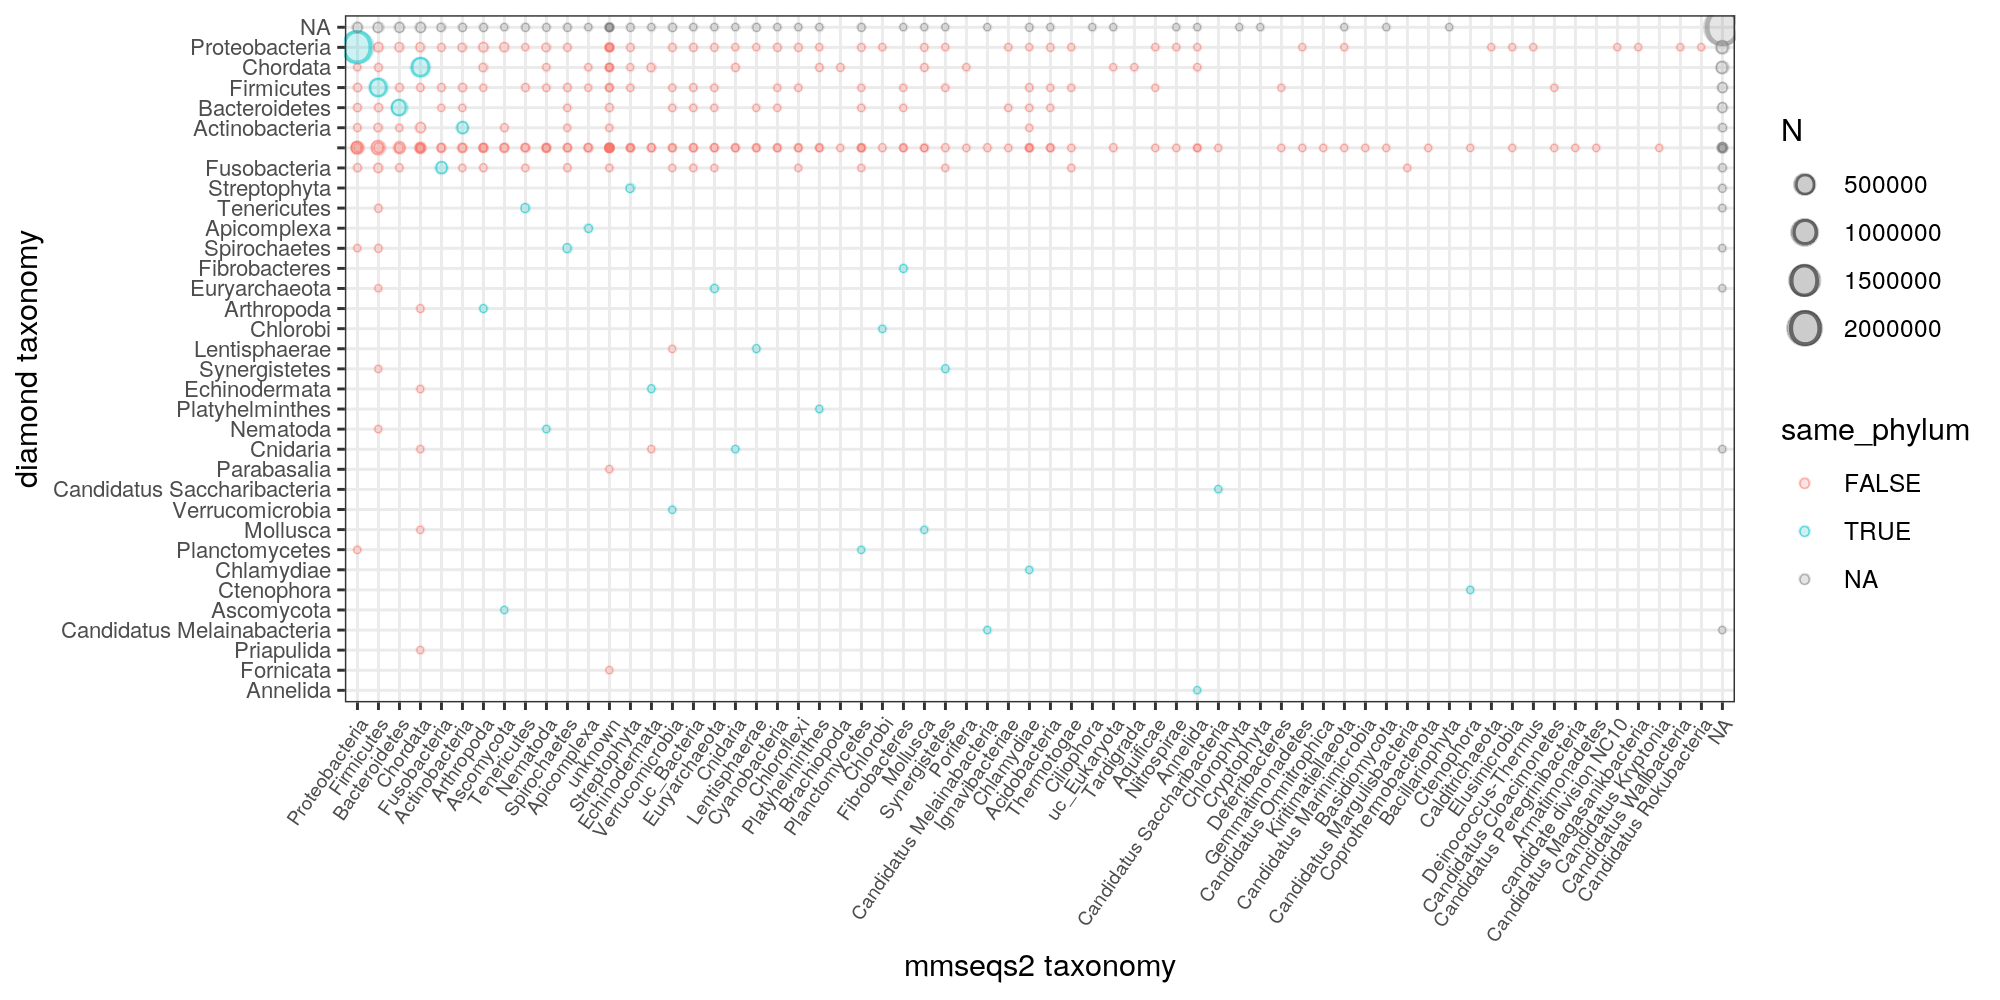

In [177]:
# plotting overlap
p = mmseqs_tax_s %>%
    dt_filter(N >= 100) %>%
    dt_mutate(i.Phylum = i.Phylum %>% reorder(N),
              Phylum = Phylum %>% reorder(-N)) %>%
    ggplot(aes(Phylum, i.Phylum, size=N, color=same_phylum)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    theme_bw() +
    labs(x='mmseqs2 taxonomy', y='diamond taxonomy') +
    theme(
        axis.text.x = element_text(angle=55, hjust=1, size=7),
        axis.text.y = element_text(size=8)
    )

p.dims(10,5)
plot(p)

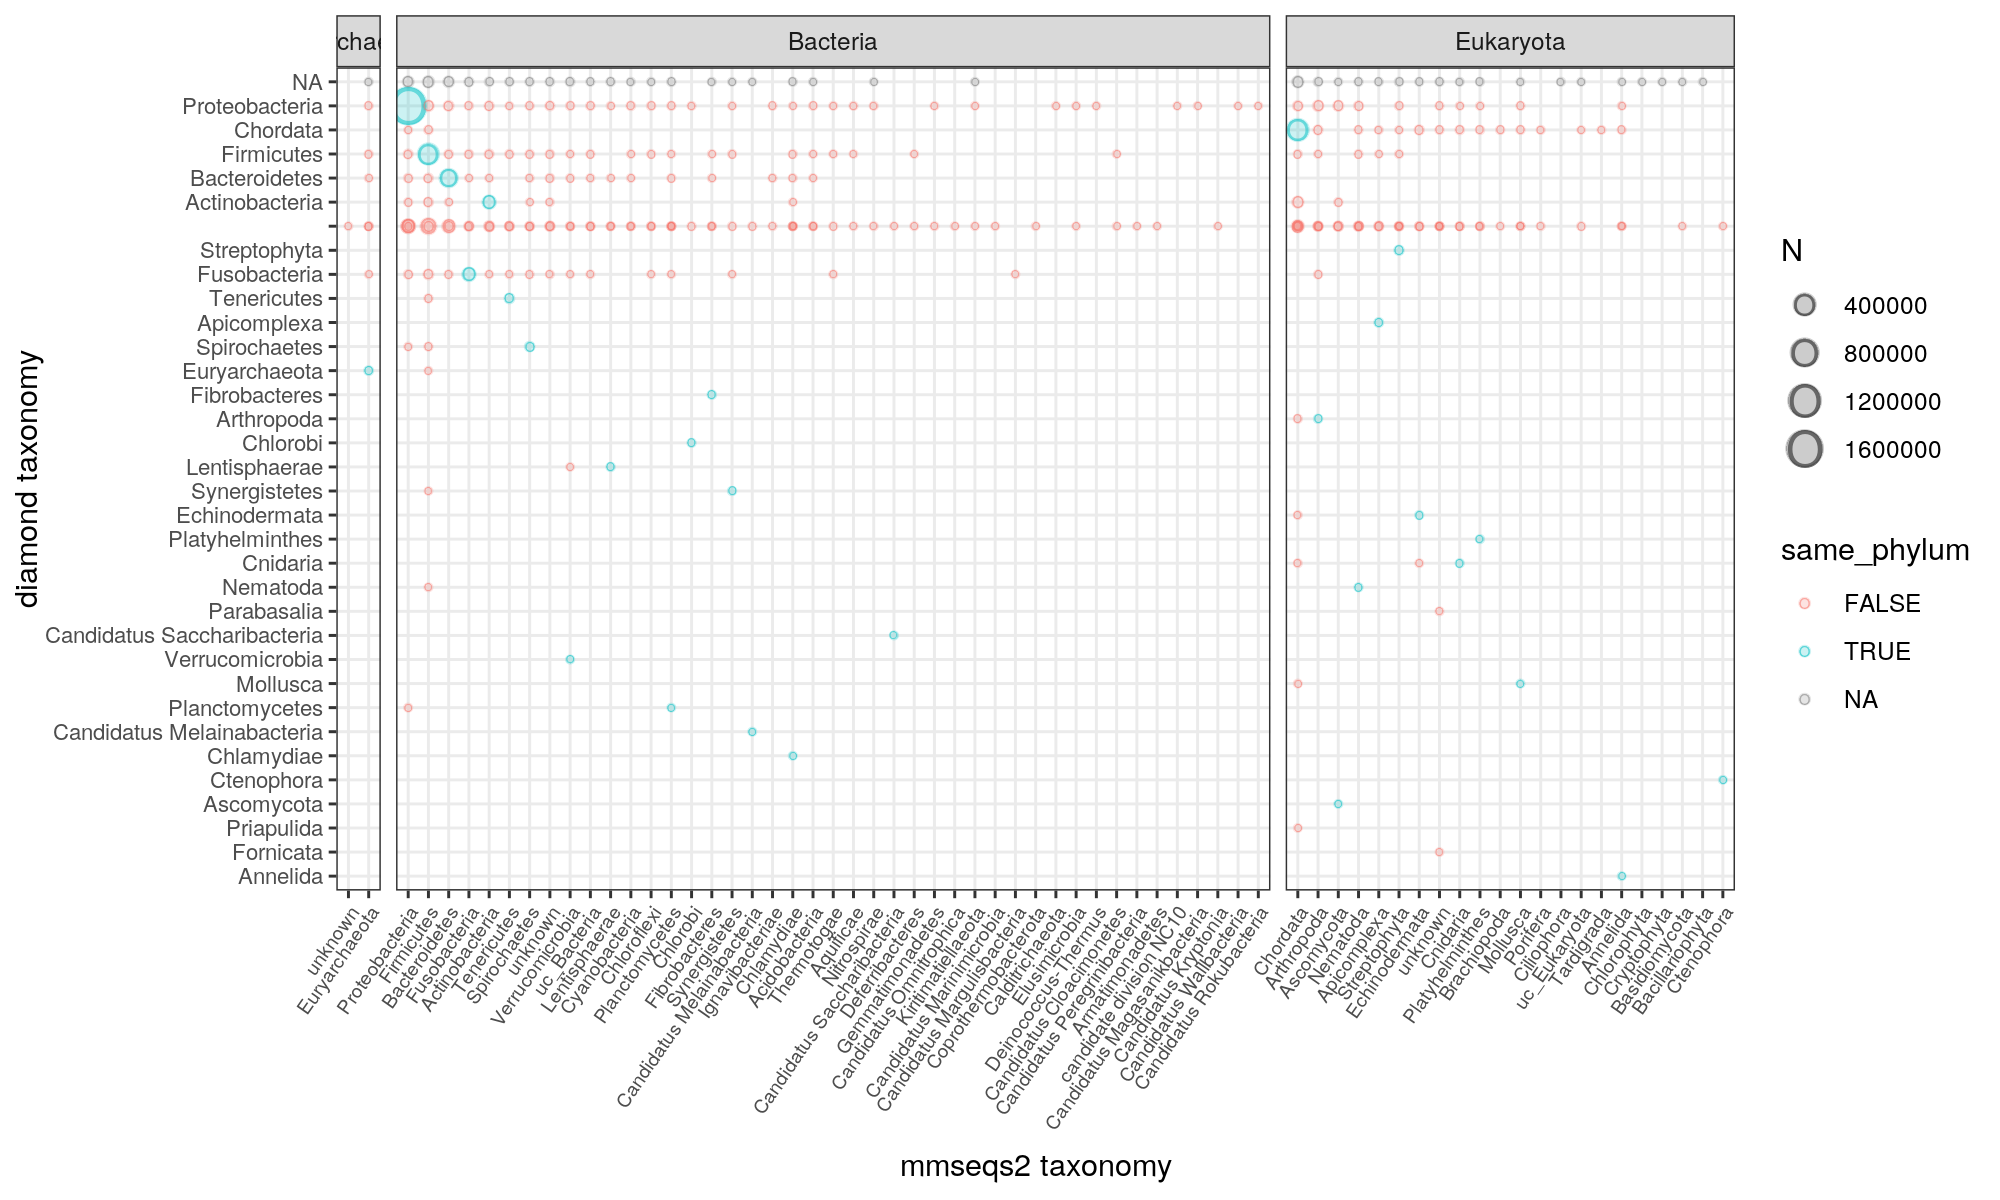

In [182]:
# plotting overlap
p = mmseqs_tax_s %>%
    dt_filter(N >= 100, 
              Domain %in% c('Archaea', 'Bacteria', 'Eukaryota')) %>%
    dt_mutate(i.Phylum = i.Phylum %>% reorder(N),
              Phylum = Phylum %>% reorder(-N)) %>%
    ggplot(aes(Phylum, i.Phylum, size=N, color=same_phylum)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    facet_grid(~ Domain, scales='free', space='free') +
    theme_bw() +
    labs(x='mmseqs2 taxonomy', y='diamond taxonomy') +
    theme(
        axis.text.x = element_text(angle=55, hjust=1, size=7),
        axis.text.y = element_text(size=8)
    )

p.dims(10,6)
plot(p)

# LLCDS: sensitive diamond mode

## Setup

In [183]:
config_file = file.path(work_dir, 'config_dmnd-sens.yaml')
cat_file(config_file)

#-- I/O --#
aa_seqs_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/cluster/linclust/clusters_rep-seqs.faa

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/LLCDS/

# samples file (if running "map" part of the pipeline
samples_file: Skip 

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog.db
## taxonomy
tax_dump: /ebio/abt3_projects/databases_no-backup/NCBI_taxonomy/2020-03-30/names.dmp
### mmseqs
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
### diamond
dmnd_tax_db: /ebio/abt3_projects/databases_no-backup/NCBI_diamond_db/nr.dmnd
## checkM
checkM_data: /ebio/a

## Run

```
screen -L -S llcds-ga-dmnd ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/LLCDS/config_dmnd-sens.yaml 70 -F --notemp
```

## Summary

In [102]:
# reading in table
tax_file = file.path(work_dir, 'taxonomy', 'diamond_sensitive', 'taxonomy.tsv.gz')
cmd = glue::glue('gunzip -c {F}', F=tax_file)
dmnd_nr_tax_sens = Fread(cmd=cmd, header=FALSE)
colnames(dmnd_nr_tax_sens) = c ('query', 'taxID', 'evalue', 'taxonomy', 'taxIDs') 

## formatting
tax_levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
dmnd_nr_tax_sens = dmnd_nr_tax_sens %>%
    #dt_mutate(taxonomy = ifelse(taxonomy == 'taxonomy', NA, taxonomy),
    #          taxIDs = ifelse(taxIDs == 'taxIDs', NA, taxIDs)) %>%
    dt_select(-taxIDs) %>%
    dt_separate(taxonomy, tax_levs, sep=';') 
dmnd_nr_tax_sens

query                            taxID  evalue   Domain   Phylum    
1       519a3871f0204119b5b0496d48c663ff 0      0        NA       NA        
2       8a993417e0244af3b77663df645e20f4 0      0        NA       NA        
⋮       ⋮                                ⋮      ⋮        ⋮        ⋮         
6391860 a6ef773f95214f4481389bc84e474c4b 131567 4.4e-163                    
6391861 7375ad24b42d4ab5bd9bba2308402cf3 216851 1.1e-101 Bacteria Firmicutes
        Class      Order         Family          Genus            Species
1       NA         NA            NA              NA               NA     
2       NA         NA            NA              NA               NA     
⋮       ⋮          ⋮             ⋮               ⋮                ⋮      
6391860                                                           NA     
6391861 Clostridia Clostridiales Ruminococcaceae Faecalibacterium NA

In [103]:
# amount classified
tmp = dmnd_nr_tax_sens %>% 
    dt_filter(!grepl('^uc_', Phylum),
              Phylum != 'unknown')
    
tmp %>% unique_n('No. of clusters', query)
tmp %>% unique_n('No. of Phyla', Phylum)
rm(tmp)

No. of unique No. of clusters: 3935337 
No. of unique No. of Phyla: 136 


In [104]:
# amount of microbial classified
to_keep = c('Archaea', 'Bacteria', 'Viruses')
tmp = dmnd_nr_tax_sens %>% 
    dt_filter(Domain %in% to_keep,
              !grepl('^uc_', Phylum))
    
tmp %>% unique_n('No. of clusters', query)
tmp %>% unique_n('No. of Phyla', Phylum)
rm(tmp)

No. of unique No. of clusters: 3146914 
No. of unique No. of Phyla: 99 


### Counts

In [105]:
# number per domain
df.dims(20)
dmnd_nr_tax_sens %>%
    dt_count(by=list(Domain))
df.dims()

Domain    N      
1 NA        2456524
2 Bacteria  3134662
3 Eukaryota  562666
4            225757
5 Viruses      9001
6 Archaea      3251

## Comparison to mmseqs2 taxonomy

In [106]:
# reading in taxonomy table
## WARING: slow
F = file.path(clust_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
#cmd = glue::glue('gunzip -c {file} | head -n 100000', file=F) 
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'X')
mmseqs_tax = fread(cmd=cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    dt_separate(lineage, into=levs, sep=':') %>%
    dt_select(-X, -taxID, -rank, -spp) %>%
    dt_rename(seqid = seqID)
mmseqs_tax

seqid                            Domain   Kingdom Phylum        
1       4f509c5351da4782bcba565a798e69da Bacteria unknown Proteobacteria
2       07de412a5c5743c7aec282ab947ff2a7 Bacteria unknown Proteobacteria
⋮       ⋮                                ⋮        ⋮       ⋮             
6391860 2497ac9df6f64aa9bcfea20fd97f7dcc Bacteria unknown Firmicutes    
6391861 4d0d134bb11449dead905e4a4049f5a3 NA       NA      NA            
        Class                 Order             Family             Genus       
1       Betaproteobacteria    Neisseriales      Chromobacteriaceae Microvirgula
2       Epsilonproteobacteria Campylobacterales Helicobacteraceae  Helicobacter
⋮       ⋮                     ⋮                 ⋮                  ⋮           
6391860 Clostridia            Clostridiales     Lachnospiraceae    Oribacterium
6391861 NA                    NA                NA                 NA          
        Species                        
1       Microvirgula aerodenitrificans 
2       Helicobacter hepaticus         
⋮       ⋮                              
6391860 Oribacterium sp. oral taxon 078
6391861 NA

In [107]:
# checking key overlap
overlap(mmseqs_tax, dmnd_nr_tax_sens, seqid, query)

intersect(x,y): 6391861 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 6391861 


In [108]:
# joining
mmseqs_tax = mmseqs_tax %>%
    dt_inner_join(dmnd_nr_tax_sens %>% dt_rename('seqid'=query),
                  by=c('seqid'))
mmseqs_tax

seqid                            Domain    Kingdom Phylum    
1       519a3871f0204119b5b0496d48c663ff NA        NA      NA        
2       8a993417e0244af3b77663df645e20f4 NA        NA      NA        
⋮       ⋮                                ⋮         ⋮       ⋮         
6391860 a6ef773f95214f4481389bc84e474c4b Eukaryota Metazoa Nematoda  
6391861 7375ad24b42d4ab5bd9bba2308402cf3 Bacteria  unknown Firmicutes
        Class      Order         Family          Genus           
1       NA         NA            NA              NA              
2       NA         NA            NA              NA              
⋮       ⋮          ⋮             ⋮               ⋮               
6391860 Enoplea    Trichinellida Trichuridae     Trichuris       
6391861 Clostridia Clostridiales Ruminococcaceae Faecalibacterium
        Species                      taxID  evalue   i.Domain i.Phylum  
1       NA                           0      0        NA       NA        
2       NA                           0      0        NA       NA        
⋮       ⋮                            ⋮      ⋮        ⋮        ⋮         
6391860 Trichuris trichiura          131567 4.4e-163                    
6391861 Faecalibacterium prausnitzii 216851 1.1e-101 Bacteria Firmicutes
        i.Class    i.Order       i.Family        i.Genus          i.Species
1       NA         NA            NA              NA               NA       
2       NA         NA            NA              NA               NA       
⋮       ⋮          ⋮             ⋮               ⋮                ⋮        
6391860                                                           NA       
6391861 Clostridia Clostridiales Ruminococcaceae Faecalibacterium NA

In [109]:
# summarizing by mmseqs taxonomy
mmseqs_tax_s = mmseqs_tax %>%
    dt_mutate(same_phylum = (Domain == i.Domain & Phylum == i.Phylum)) %>%
    dt_count(by=list(same_phylum, Domain, Phylum)) 
mmseqs_tax_s

same_phylum Domain   Phylum                     N      
1      NA       NA       NA                         2629072
2   FALSE       Bacteria Proteobacteria              164768
⋮   ⋮           ⋮        ⋮                          ⋮      
463 TRUE        Bacteria Candidatus Raymondbacteria 1      
464 TRUE        Bacteria Aquificae                  1

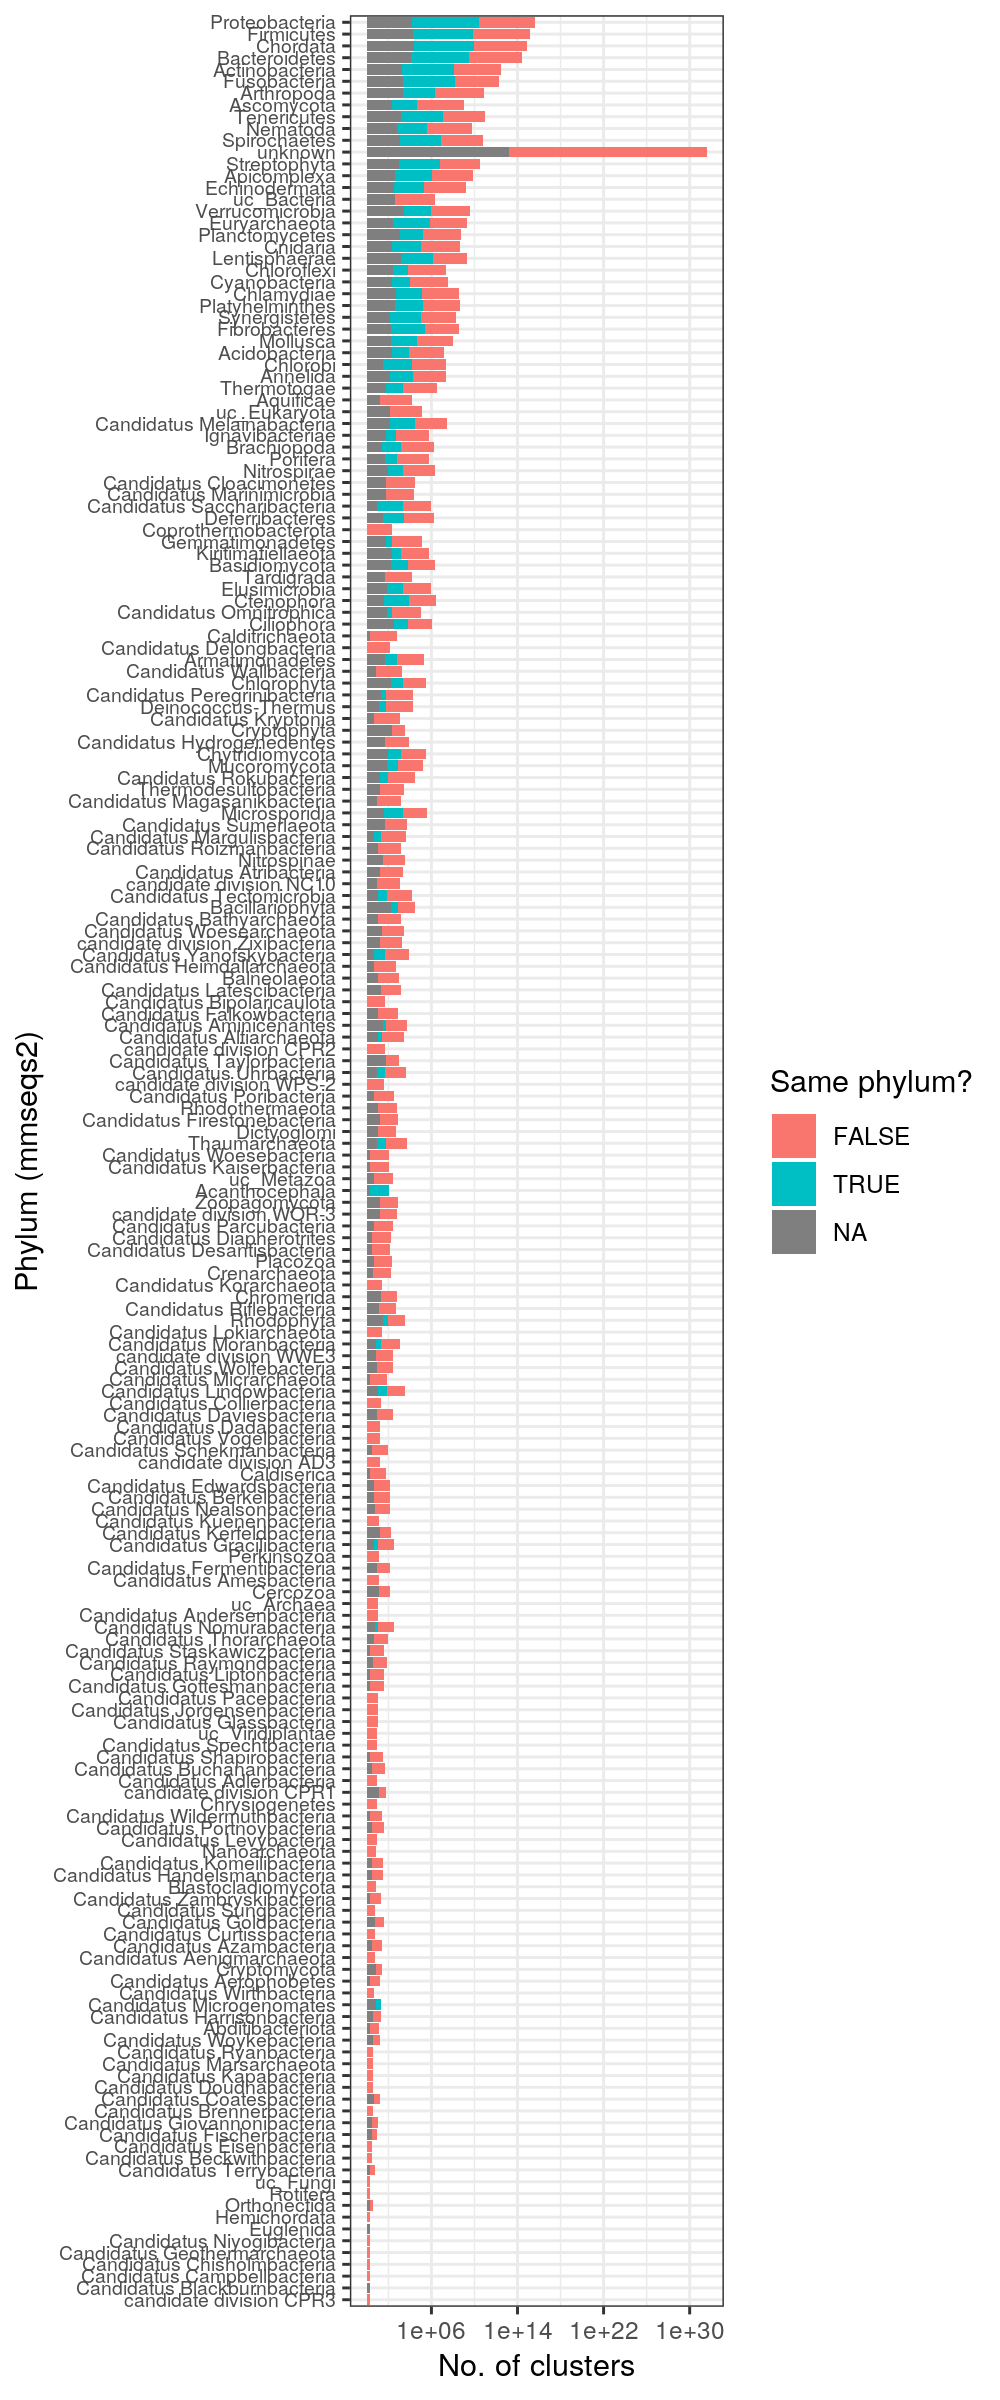

In [110]:
# plotting overlap (mmseqs taxonomy)
p = mmseqs_tax_s %>%
    dt_filter(N > 1,
              !is.na(Phylum),
              Phylum != '') %>%
    dt_mutate(Phylum = Phylum %>% reorder(N)) %>%
    ggplot(aes(Phylum, N, fill=same_phylum)) +
    geom_bar(stat='identity') +
    labs(x='Phylum (mmseqs2)', y='No. of clusters') +
    scale_fill_discrete('Same phylum?') +
    scale_y_log10() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    ) +
    coord_flip()

p.dims(5,12)
plot(p)

In [113]:
# summarizing by both taxonomies
to_keep = c('Archaea', 'Bacteria', 'Eukaryota', 'Viruses')
mmseqs_tax_s = mmseqs_tax %>%
    dt_mutate(Phylum = ifelse(Phylum == '' | is.na(Phylum) | grepl('^uc_', Phylum), 
                              'unclassified', Phylum),
              i.Phylum = ifelse(i.Phylum == '' | is.na(i.Phylum) | grepl('^uc_', i.Phylum), 
                                'unclassified', i.Phylum)) %>%
    dt_mutate(N_by_Phylum = n_distinct(seqid), by=list(Phylum)) %>%
    dt_mutate(N_by_iPhylum = n_distinct(seqid), by=list(i.Phylum)) %>%
    dt_filter(Domain %in% to_keep,
              i.Domain %in% to_keep) %>%
    dt_mutate(same_phylum = (Domain == i.Domain & Phylum == i.Phylum)) %>%
    dt_count(by=list(same_phylum, Domain, Phylum, i.Domain, i.Phylum, N_by_Phylum, N_by_iPhylum)) 
mmseqs_tax_s

same_phylum Domain    Phylum                    i.Domain 
1    FALSE       Bacteria  Proteobacteria            Bacteria 
2     TRUE       Eukaryota Chordata                  Eukaryota
⋮    ⋮           ⋮         ⋮                         ⋮        
1794 FALSE       Bacteria  Candidatus Falkowbacteria Bacteria 
1795 FALSE       Bacteria  Candidatus Ryanbacteria   Bacteria 
     i.Phylum                   N_by_Phylum N_by_iPhylum N     
1    unclassified               1871187     3086231       78538
2    Chordata                    534946      525350      424593
⋮    ⋮                          ⋮           ⋮            ⋮     
1794 Candidatus Melainabacteria 89          576          1     
1795 Cyanobacteria               5           88          1

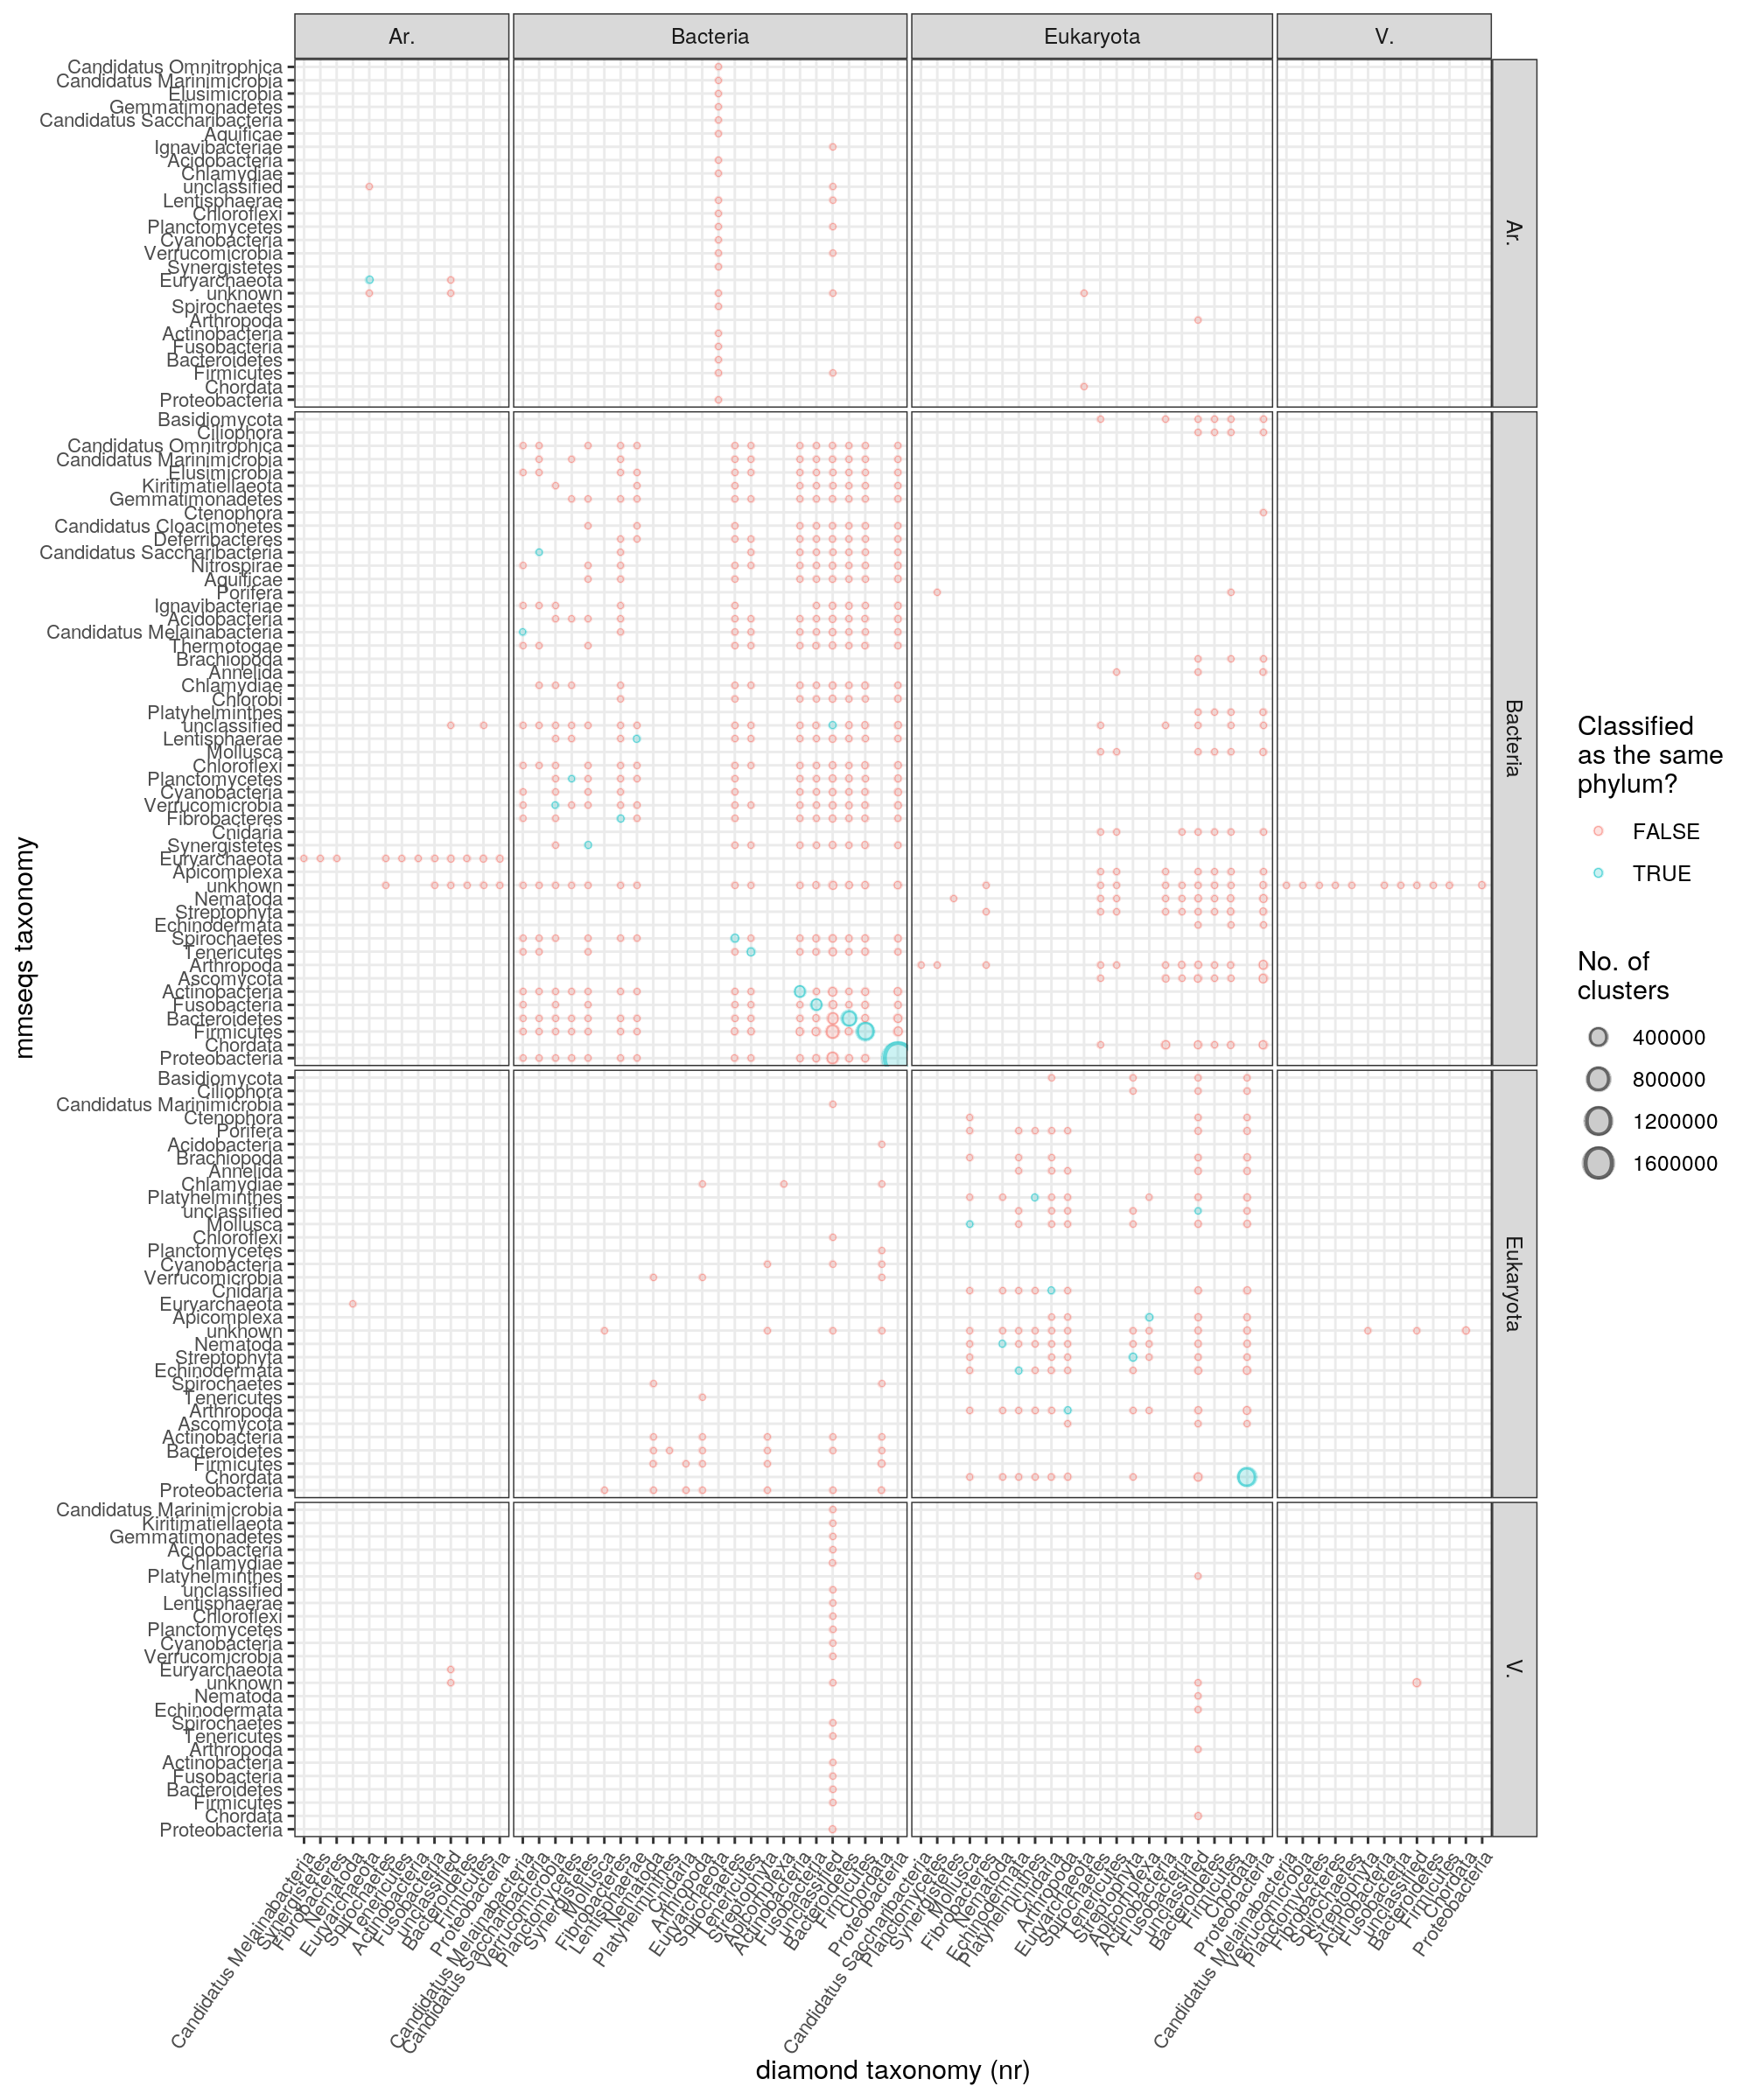

In [117]:
# plotting overlap
p = mmseqs_tax_s %>%
    dt_filter(N_by_Phylum >= 500,
              N_by_iPhylum >= 500) %>%
    dt_mutate(Domain = ifelse(Domain == 'Archaea', 'Ar.', Domain),    
              i.Domain = ifelse(i.Domain == 'Archaea', 'Ar.', i.Domain),
              Domain = ifelse(Domain == 'Viruses', 'V.', Domain),
              i.Domain = ifelse(i.Domain == 'Viruses', 'V.', i.Domain),
              Phylum = Phylum %>% reorder(-N),
              i.Phylum = i.Phylum %>% reorder(N)) %>%
    ggplot(aes(i.Phylum, Phylum, size=N, color=same_phylum)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    scale_color_discrete('Classified\nas the same\nphylum?') +
    scale_size_continuous('No. of\nclusters') +
    labs(y='mmseqs taxonomy', x='diamond taxonomy (nr)') +
    facet_grid(i.Domain ~ Domain, scales='free', space='free') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1, size=8),
        axis.text.y = element_text(size=8),
        panel.spacing = unit(0.1, "lines")
    )

p.dims(10,12)
plot(p)

In [118]:
# summarizing by both taxonomies (microbial)
to_keep = c('Archaea', 'Bacteria', 'Viruses')
mmseqs_tax_s = mmseqs_tax %>%
    dt_mutate(Phylum = ifelse(Phylum == '' | is.na(Phylum) | grepl('^uc_', Phylum), 
                              'unclassified', Phylum),
              i.Phylum = ifelse(i.Phylum == '' | is.na(i.Phylum) | grepl('^uc_', i.Phylum), 
                                'unclassified', i.Phylum)) %>%
    dt_mutate(N_by_Phylum = n_distinct(seqid), by=list(Phylum)) %>%
    dt_mutate(N_by_iPhylum = n_distinct(seqid), by=list(i.Phylum)) %>%
    dt_filter(Domain %in% to_keep,
              i.Domain %in% to_keep) %>%
    dt_mutate(same_phylum = (Domain == i.Domain & Phylum == i.Phylum)) %>%
    dt_count(by=list(same_phylum, Domain, Phylum, i.Domain, i.Phylum, N_by_Phylum, N_by_iPhylum)) 
mmseqs_tax_s

same_phylum Domain   Phylum                    i.Domain
1    FALSE       Bacteria Proteobacteria            Bacteria
2     TRUE       Bacteria Proteobacteria            Bacteria
⋮    ⋮           ⋮        ⋮                         ⋮       
1282 FALSE       Bacteria Candidatus Falkowbacteria Bacteria
1283 FALSE       Bacteria Candidatus Ryanbacteria   Bacteria
     i.Phylum                   N_by_Phylum N_by_iPhylum N      
1    unclassified               1871187     3086231        78538
2    Proteobacteria             1871187     1888435      1690797
⋮    ⋮                          ⋮           ⋮            ⋮      
1282 Candidatus Melainabacteria 89          576          1      
1283 Cyanobacteria               5           88          1

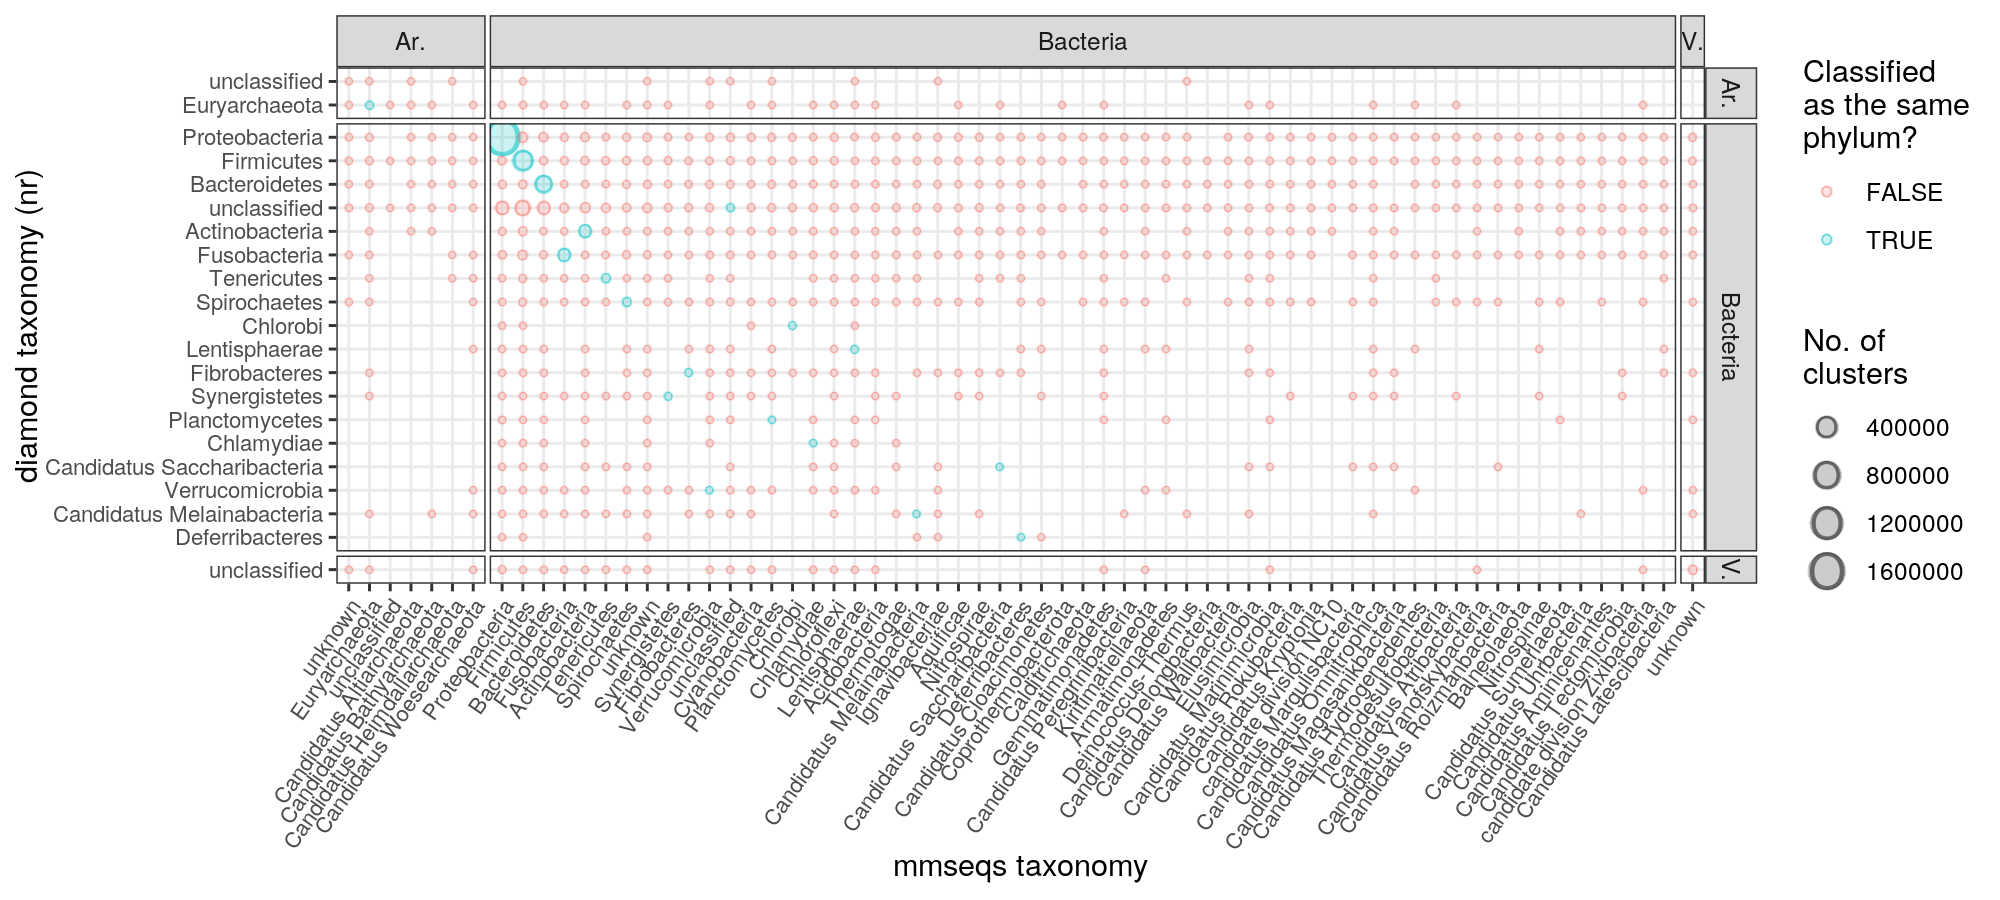

In [122]:
# plotting overlap
p = mmseqs_tax_s %>%
    dt_filter(N_by_Phylum >= 100,
              N_by_iPhylum >= 100) %>%
    dt_mutate(Domain = ifelse(Domain == 'Archaea', 'Ar.', Domain),    
              i.Domain = ifelse(i.Domain == 'Archaea', 'Ar.', i.Domain),
              Domain = ifelse(Domain == 'Viruses', 'V.', Domain),
              i.Domain = ifelse(i.Domain == 'Viruses', 'V.', i.Domain),
              Phylum = Phylum %>% reorder(-N),
              i.Phylum = i.Phylum %>% reorder(N)) %>%
    ggplot(aes(Phylum, i.Phylum, size=N, color=same_phylum)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    scale_color_discrete('Classified\nas the same\nphylum?') +
    scale_size_continuous('No. of\nclusters') +
    labs(x='mmseqs taxonomy', y='diamond taxonomy (nr)') +
    facet_grid(i.Domain ~ Domain, scales='free', space='free') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1, size=8),
        axis.text.y = element_text(size=8),
        panel.spacing = unit(0.1, "lines")
    )

p.dims(10,4.5)
plot(p)

# LLCDS: GTDB w/ sensitive

## Setup

In [198]:
 file.path(work_dir, 'config_dmnd-sens_GTDB.yaml')

[1] "/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/LLCDS//config_dmnd-sens_GTDB.yaml"

In [208]:
config_file = file.path(work_dir, 'config_dmnd-sens_GTDB.yaml')
cat_file(config_file)

#-- I/O --#
aa_seqs_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/cluster/linclust/clusters_rep-seqs.faa

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/LLCDS/

# samples file (if running "map" part of the pipeline
samples_file: Skip 

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog.db
## taxonomy
#tax_dump: /ebio/abt3_projects/databases_no-backup/NCBI_taxonomy/2020-03-30/names.dmp
tax_dump: /ebio/abt3_projects/databases_no-backup/GTDB/release89/taxdump/diamond_db/names.dmp
### mmseqs
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
### diamond
#dmnd_tax_db

## Run

```
screen -L -S llcds-ga-dmnd ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/merged/linclust50/LLCDS/config_dmnd-sens_GTDB.yaml 70 -F --notemp
```

## Summary

In [35]:
# reading in table
tax_file = file.path(work_dir, 'taxonomy', 'diamond_GTDB_sensitive', 'taxonomy.tsv.gz')
cmd = glue::glue('gunzip -c {F}', F=tax_file)
dmnd_gtdb_tax_sens = Fread(cmd=cmd, header=FALSE)
colnames(dmnd_gtdb_tax_sens) = c ('query', 'taxID', 'evalue', 'taxonomy', 'taxIDs') 

## formatting
tax_levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
dmnd_gtdb_tax_sens = dmnd_gtdb_tax_sens %>%
    dt_mutate(taxonomy = ifelse(taxonomy == 'taxonomy', NA, taxonomy),
              taxIDs = ifelse(taxIDs == 'taxIDs', NA, taxIDs)) %>%
    dt_select(-taxIDs) %>%
    dt_separate(taxonomy, tax_levs, sep=';') 
dmnd_gtdb_tax_sens

query                            taxID  evalue   Domain  
1       519a3871f0204119b5b0496d48c663ff 0      0        NA      
2       8a993417e0244af3b77663df645e20f4 0      0        NA      
⋮       ⋮                                ⋮      ⋮        ⋮       
6391860 a6ef773f95214f4481389bc84e474c4b  14018 4.7e-163 Bacteria
6391861 7375ad24b42d4ab5bd9bba2308402cf3 112344 8.7e-102 Bacteria
        Phylum         Class               Order            Family            
1       NA             NA                  NA               NA                
2       NA             NA                  NA               NA                
⋮       ⋮              ⋮                   ⋮                ⋮                 
6391860 Proteobacteria Gammaproteobacteria Enterobacterales Enterobacteriaceae
6391861 FirmicutesA    Clostridia          Oscillospirales  Ruminococcaceae   
        Genus            Species                      
1       NA               NA                           
2       NA               NA                           
⋮       ⋮                ⋮                            
6391860                  NA                           
6391861 Faecalibacterium Faecalibacterium prausnitziiC

In [36]:
# amount classified
tmp = dmnd_gtdb_tax_sens %>% 
    dt_filter(!grepl('^uc_', Phylum),
              Phylum != 'unknown')
    
tmp %>% unique_n('No. of clusters', query)
tmp %>% unique_n('No. of Phyla', Phylum)
rm(tmp)

No. of unique No. of clusters: 3450151 
No. of unique No. of Phyla: 112 


In [37]:
# amount of microbial classified
to_keep = c('Archaea', 'Bacteria', 'Viruses')
tmp = dmnd_gtdb_tax_sens %>% 
    dt_filter(Domain %in% to_keep,
              !grepl('^uc_', Phylum))
    
tmp %>% unique_n('No. of clusters', query)
tmp %>% unique_n('No. of Phyla', Phylum)
rm(tmp)

No. of unique No. of clusters: 3429225 
No. of unique No. of Phyla: 112 


### Counts

In [39]:
# number per domain
df.dims(20)
dmnd_gtdb_tax_sens %>%
    dt_count(by=list(Domain))
df.dims()

Domain   N      
1 NA       2941710
2 Bacteria 3411322
3 Archaea    17903
4            20926

## Comparison to mmseqs taxonomy

In [40]:
# reading in taxonomy table
## WARING: slow
F = file.path(clust_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
#cmd = glue::glue('gunzip -c {file} | head -n 100000', file=F) 
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'X')
mmseqs_tax = fread(cmd=cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    dt_separate(lineage, into=levs, sep=':') %>%
    dt_select(-X, -taxID, -rank, -spp) %>%
    dt_rename(seqid = seqID)
mmseqs_tax

seqid                            Domain   Kingdom Phylum        
1       4f509c5351da4782bcba565a798e69da Bacteria unknown Proteobacteria
2       07de412a5c5743c7aec282ab947ff2a7 Bacteria unknown Proteobacteria
⋮       ⋮                                ⋮        ⋮       ⋮             
6391860 2497ac9df6f64aa9bcfea20fd97f7dcc Bacteria unknown Firmicutes    
6391861 4d0d134bb11449dead905e4a4049f5a3 NA       NA      NA            
        Class                 Order             Family             Genus       
1       Betaproteobacteria    Neisseriales      Chromobacteriaceae Microvirgula
2       Epsilonproteobacteria Campylobacterales Helicobacteraceae  Helicobacter
⋮       ⋮                     ⋮                 ⋮                  ⋮           
6391860 Clostridia            Clostridiales     Lachnospiraceae    Oribacterium
6391861 NA                    NA                NA                 NA          
        Species                        
1       Microvirgula aerodenitrificans 
2       Helicobacter hepaticus         
⋮       ⋮                              
6391860 Oribacterium sp. oral taxon 078
6391861 NA

In [41]:
# checking key overlap
overlap(mmseqs_tax, dmnd_gtdb_tax_sens, seqid, query)

intersect(x,y): 6391861 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 6391861 


In [42]:
# joining
mmseqs_tax = mmseqs_tax %>%
    dt_inner_join(dmnd_gtdb_tax_sens %>% dt_rename('seqid'=query),
                  by=c('seqid'))
mmseqs_tax

seqid                            Domain    Kingdom Phylum    
1       519a3871f0204119b5b0496d48c663ff NA        NA      NA        
2       8a993417e0244af3b77663df645e20f4 NA        NA      NA        
⋮       ⋮                                ⋮         ⋮       ⋮         
6391860 a6ef773f95214f4481389bc84e474c4b Eukaryota Metazoa Nematoda  
6391861 7375ad24b42d4ab5bd9bba2308402cf3 Bacteria  unknown Firmicutes
        Class      Order         Family          Genus           
1       NA         NA            NA              NA              
2       NA         NA            NA              NA              
⋮       ⋮          ⋮             ⋮               ⋮               
6391860 Enoplea    Trichinellida Trichuridae     Trichuris       
6391861 Clostridia Clostridiales Ruminococcaceae Faecalibacterium
        Species                      taxID  evalue   i.Domain i.Phylum      
1       NA                           0      0        NA       NA            
2       NA                           0      0        NA       NA            
⋮       ⋮                            ⋮      ⋮        ⋮        ⋮             
6391860 Trichuris trichiura           14018 4.7e-163 Bacteria Proteobacteria
6391861 Faecalibacterium prausnitzii 112344 8.7e-102 Bacteria FirmicutesA   
        i.Class             i.Order          i.Family          
1       NA                  NA               NA                
2       NA                  NA               NA                
⋮       ⋮                   ⋮                ⋮                 
6391860 Gammaproteobacteria Enterobacterales Enterobacteriaceae
6391861 Clostridia          Oscillospirales  Ruminococcaceae   
        i.Genus          i.Species                    
1       NA               NA                           
2       NA               NA                           
⋮       ⋮                ⋮                            
6391860                  NA                           
6391861 Faecalibacterium Faecalibacterium prausnitziiC

In [43]:
# summarizing by mmseqs taxonomy
mmseqs_tax_s = mmseqs_tax %>%
    dt_mutate(same_phylum = (Domain == i.Domain & Phylum == i.Phylum)) %>%
    dt_count(by=list(same_phylum, Domain, Phylum)) 
mmseqs_tax_s

same_phylum Domain    Phylum                  N      
1     NA        NA        NA                      2629072
2   TRUE        Bacteria  Proteobacteria          1763742
⋮   ⋮           ⋮         ⋮                       ⋮      
362 FALSE       Eukaryota Orthonectida            1      
363    NA       Bacteria  Candidatus Levybacteria 1

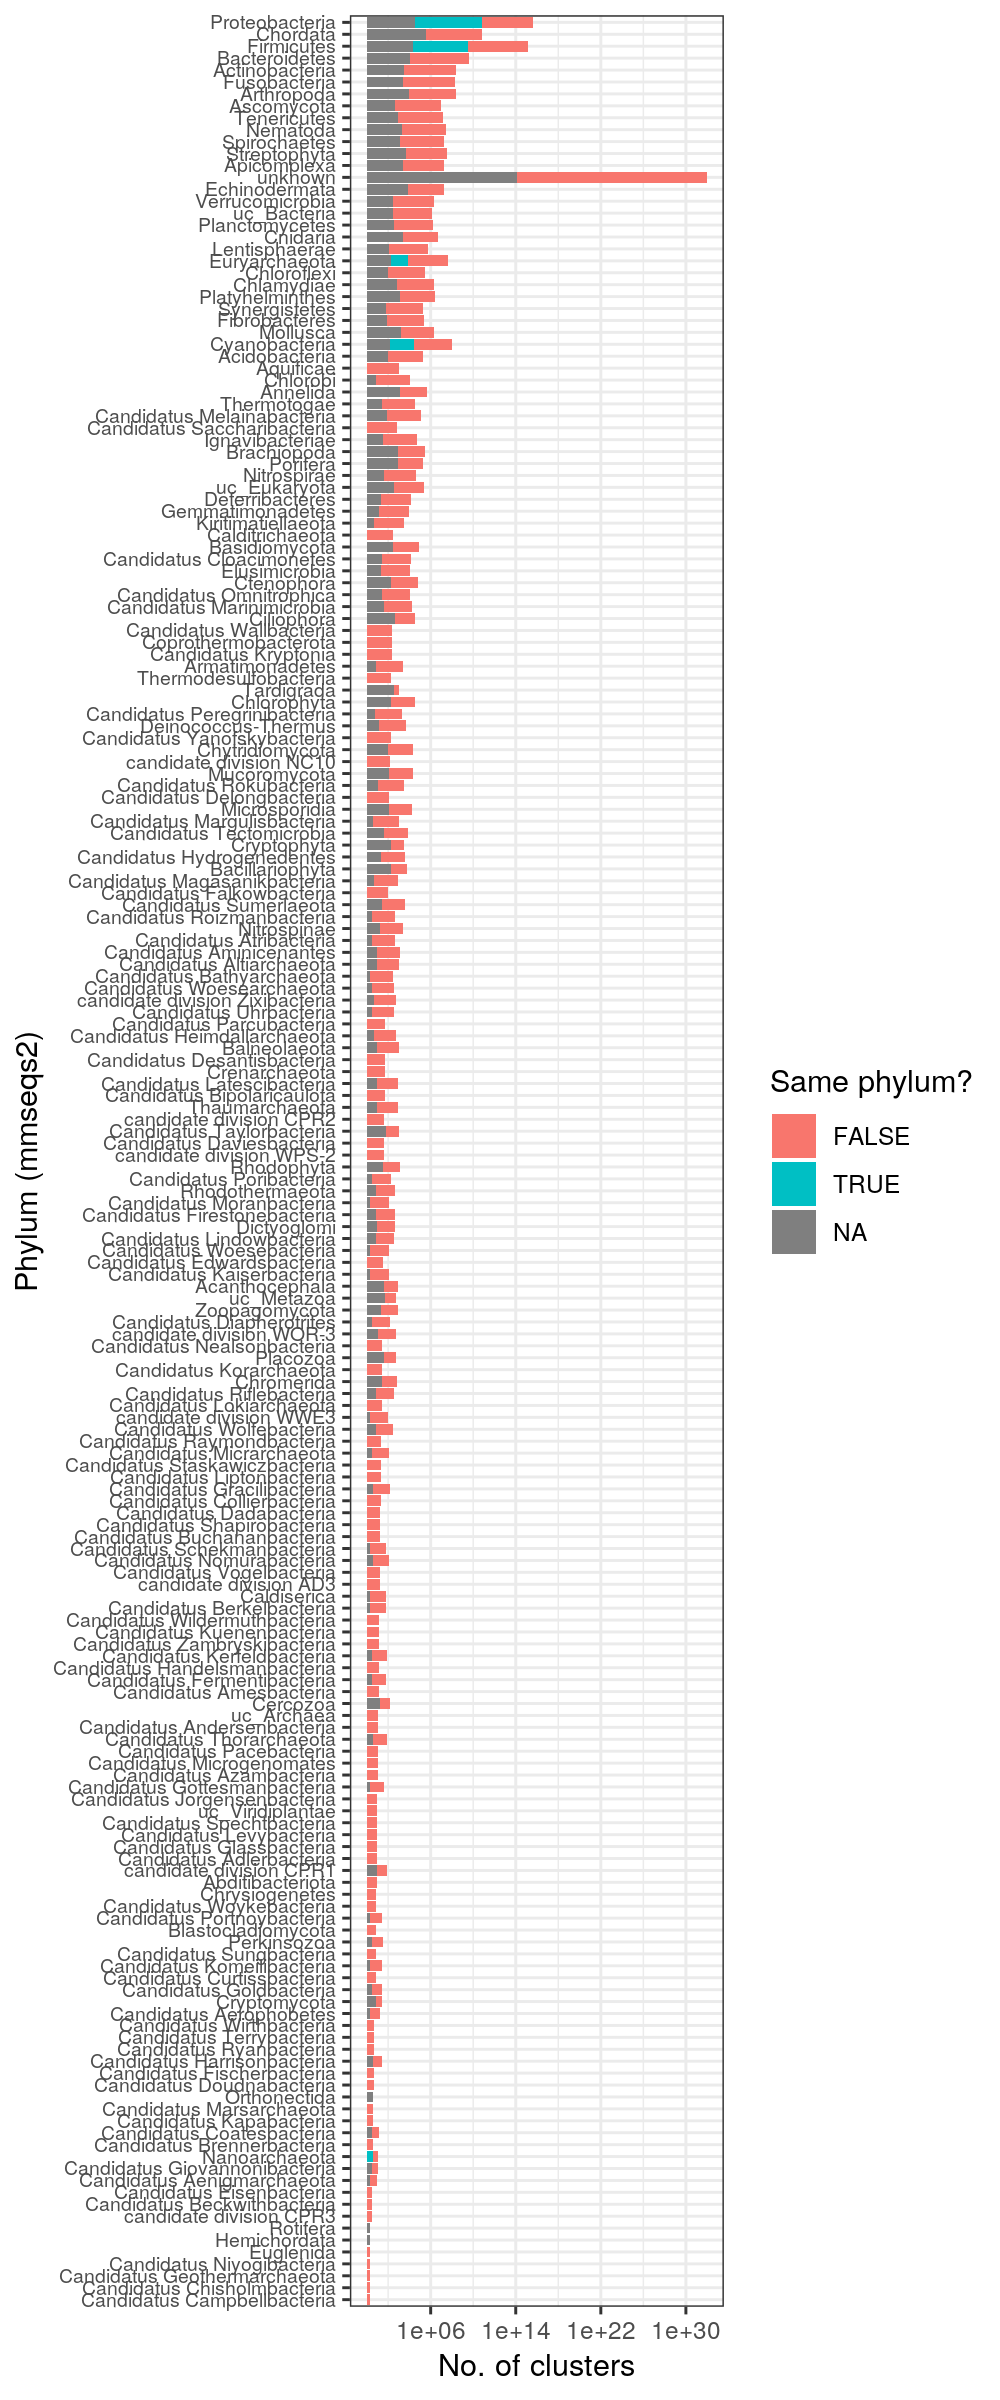

In [44]:
# plotting overlap (mmseqs taxonomy)
p = mmseqs_tax_s %>%
    dt_filter(N > 1,
              !is.na(Phylum),
              Phylum != '') %>%
    dt_mutate(Phylum = Phylum %>% reorder(N)) %>%
    ggplot(aes(Phylum, N, fill=same_phylum)) +
    geom_bar(stat='identity') +
    labs(x='Phylum (mmseqs2)', y='No. of clusters') +
    scale_fill_discrete('Same phylum?') +
    scale_y_log10() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    ) +
    coord_flip()

p.dims(5,12)
plot(p)

In [67]:
# summarizing by both taxonomies
mmseqs_tax_s = mmseqs_tax %>%
    #dt_mutate(same_phylum = (Domain == i.Domain & Phylum == i.Phylum)) %>%
    dt_mutate(i.Phylum = ifelse((i.Phylum == '' | is.na(i.Phylum)), 'unknown', i.Phylum)) %>%
    dt_count(by=list(Domain, Phylum, i.Domain, i.Phylum)) %>%
    dt_mutate(N_by_Phylum = sum(N), by=list(Phylum)) %>%
    dt_mutate(N_by_iPhylum = sum(N), by=list(i.Phylum))
mmseqs_tax_s

Domain   Phylum                    i.Domain i.Phylum          N      
1    NA       NA                        NA       unknown           2439477
2    Bacteria Proteobacteria            Bacteria Proteobacteria    1763742
⋮    ⋮        ⋮                         ⋮        ⋮                 ⋮      
2719 Bacteria Candidatus Falkowbacteria Bacteria Cyanobacteria     1      
2720 Bacteria Candidatus Ryanbacteria   Bacteria Verrucomicrobiota 1      
     N_by_Phylum N_by_iPhylum
1    2629072     3225384     
2    1871187     2009640     
⋮    ⋮           ⋮           
2719 89           4557       
2720  5          22031

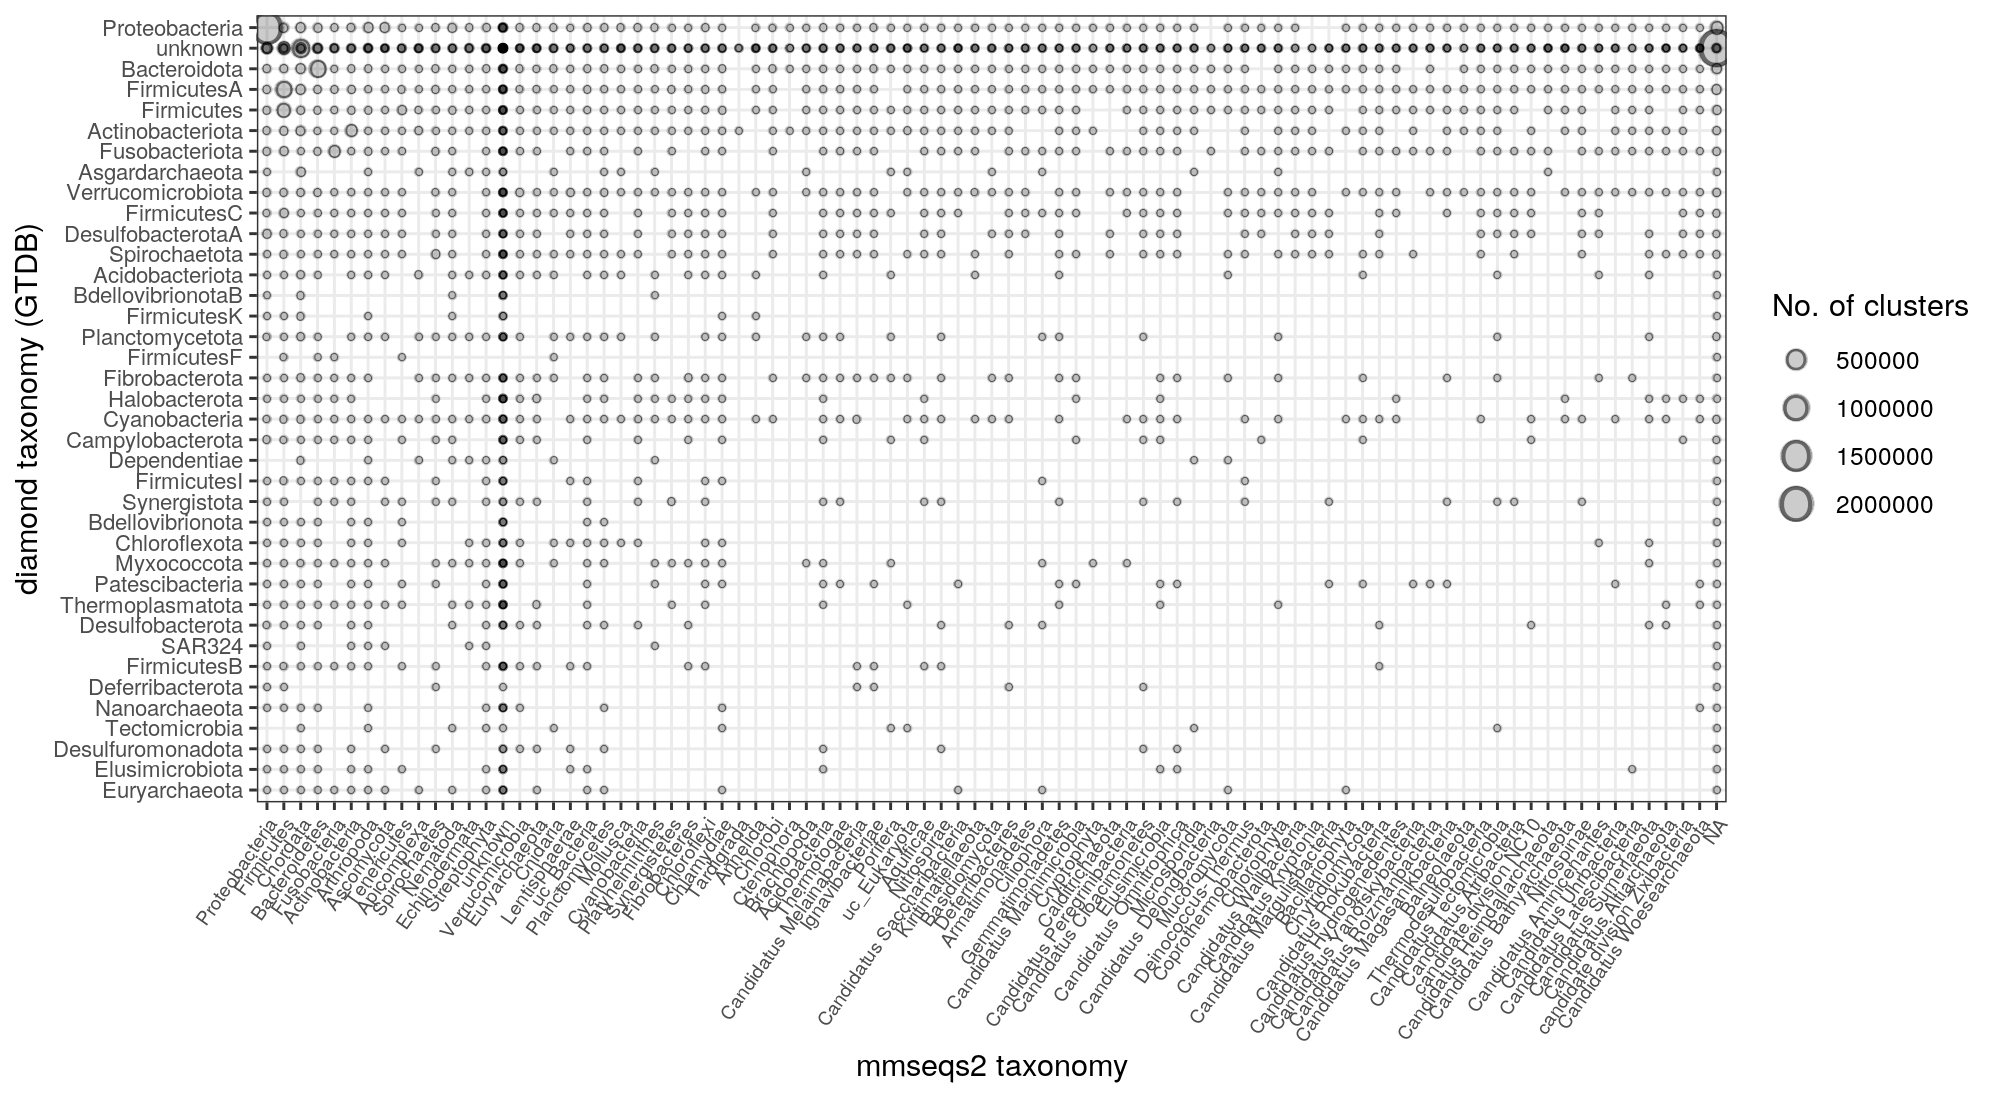

In [68]:
# plotting overlap
p = mmseqs_tax_s %>%
    dt_filter(N_by_Phylum >= 100,
              N_by_iPhylum >= 100) %>%
    dt_mutate(i.Phylum = i.Phylum %>% reorder(N),
              Phylum = Phylum %>% reorder(-N)) %>%
    ggplot(aes(Phylum, i.Phylum, size=N)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('No. of clusters') +
    theme_bw() +
    labs(x='mmseqs2 taxonomy', y='diamond taxonomy (GTDB)') +
    theme(
        axis.text.x = element_text(angle=55, hjust=1, size=7),
        axis.text.y = element_text(size=8)
    )

p.dims(10,5.5)
plot(p)

## Comparison to diamond nr taxonomy

In [71]:
# checking key overlap
overlap(dmnd_nr_tax_sens, dmnd_gtdb_tax_sens, query, query)

intersect(x,y): 6391861 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 6391861 


In [72]:
# joining
dmnd_tax = dmnd_nr_tax_sens %>%
    dt_inner_join(dmnd_gtdb_tax_sens, by=c('query'))
dmnd_tax

query                            taxID  evalue   Domain   Phylum    
1       519a3871f0204119b5b0496d48c663ff 0      0        NA       NA        
2       8a993417e0244af3b77663df645e20f4 0      0        NA       NA        
⋮       ⋮                                ⋮      ⋮        ⋮        ⋮         
6391860 a6ef773f95214f4481389bc84e474c4b 131567 4.4e-163                    
6391861 7375ad24b42d4ab5bd9bba2308402cf3 216851 1.1e-101 Bacteria Firmicutes
        Class      Order         Family          Genus            Species
1       NA         NA            NA              NA               NA     
2       NA         NA            NA              NA               NA     
⋮       ⋮          ⋮             ⋮               ⋮                ⋮      
6391860                                                           NA     
6391861 Clostridia Clostridiales Ruminococcaceae Faecalibacterium NA     
        i.taxID i.evalue i.Domain i.Phylum       i.Class            
1       0       0        NA       NA             NA                 
2       0       0        NA       NA             NA                 
⋮       ⋮       ⋮        ⋮        ⋮              ⋮                  
6391860  14018  4.7e-163 Bacteria Proteobacteria Gammaproteobacteria
6391861 112344  8.7e-102 Bacteria FirmicutesA    Clostridia         
        i.Order          i.Family           i.Genus         
1       NA               NA                 NA              
2       NA               NA                 NA              
⋮       ⋮                ⋮                  ⋮               
6391860 Enterobacterales Enterobacteriaceae                 
6391861 Oscillospirales  Ruminococcaceae    Faecalibacterium
        i.Species                    
1       NA                           
2       NA                           
⋮       ⋮                            
6391860 NA                           
6391861 Faecalibacterium prausnitziiC

In [75]:
# summarizing by both taxonomies
dmnd_tax_s = dmnd_tax %>%
    dt_mutate(Phylum = ifelse(Phylum == '' | is.na(Phylum), 'unclassified', Phylum),
              i.Phylum = ifelse(i.Phylum == '' | is.na(i.Phylum), 'unclassified', i.Phylum)) %>%
    #dt_mutate(same_phylum = (Domain == i.Domain & Phylum == i.Phylum)) %>%
    dt_count(by=list(Domain, Phylum, i.Domain, i.Phylum)) %>%
    dt_mutate(N_by_Phylum = sum(N), by=list(Phylum)) %>%
    dt_mutate(N_by_iPhylum = sum(N), by=list(i.Phylum))
dmnd_tax_s

Domain   Phylum                      i.Domain i.Phylum       N      
1    NA       unclassified                NA       unclassified   2399605
2    Bacteria unclassified                Bacteria Proteobacteria   79239
⋮    ⋮        ⋮                           ⋮        ⋮              ⋮      
1268 Bacteria Candidatus Saccharibacteria Bacteria Proteobacteria 1      
1269 Bacteria Bacteroidetes               Bacteria RBG-13-61-14   1      
     N_by_Phylum N_by_iPhylum
1    3086231     3225384     
2    3086231     2009640     
⋮    ⋮           ⋮           
1268    504      2009640     
1269 255362           11

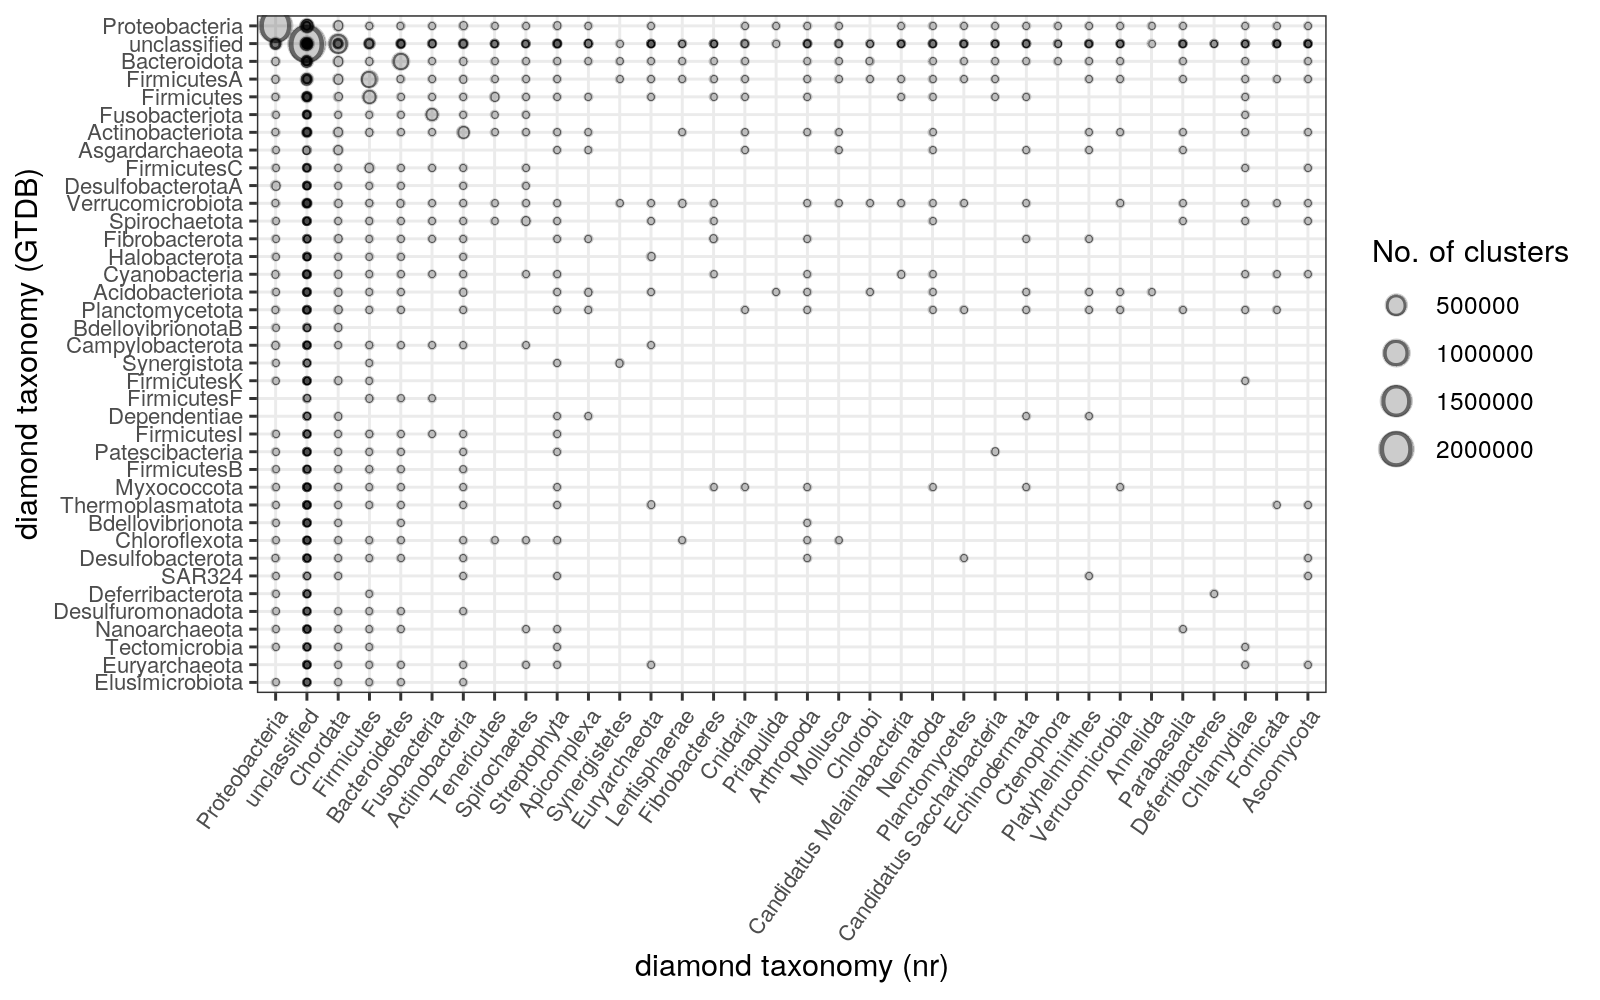

In [76]:
# plotting overlap
p = dmnd_tax_s %>%
    dt_filter(N_by_Phylum >= 100,
              N_by_iPhylum >= 100) %>%
    dt_mutate(i.Phylum = i.Phylum %>% reorder(N),
              Phylum = Phylum %>% reorder(-N)) %>%
    ggplot(aes(Phylum, i.Phylum, size=N)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('No. of clusters') +
    labs(x='diamond taxonomy (nr)', y='diamond taxonomy (GTDB)') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1, size=8),
        axis.text.y = element_text(size=8)
    )

p.dims(8,5)
plot(p)

In [99]:
# e-value assessments
dmnd_tax %>% summary_x('nr evalues', evalue)
dmnd_tax %>% summary_x('gtdb evalues', i.evalue)

Min. 1st Qu. Median   Mean         3rd Qu. Max.  sd sd_err_of_mean
nr evalues 0    0       2.8e-105 2.500498e-08 7e-38   1e-05 0  0

Min. 1st Qu. Median   Mean         3rd Qu. Max.  sd sd_err_of_mean
gtdb evalues 0    0       4.6e-180 2.300019e-08 3.3e-43 1e-05 0  0

In [93]:
# summarizing by both taxonomies (microbial)
to_keep = c('Archaea', 'Bacteria', 'Viruses')
dmnd_tax_s = dmnd_tax %>%
    dt_mutate(Phylum = ifelse(Phylum == '' | is.na(Phylum), 'unclassified', Phylum),
              i.Phylum = ifelse(i.Phylum == '' | is.na(i.Phylum), 'unclassified', i.Phylum)) %>%
    dt_mutate(N_by_Phylum = n_distinct(query), by=list(Phylum)) %>%
    dt_mutate(N_by_iPhylum = n_distinct(query), by=list(i.Phylum)) %>%
    dt_filter(Domain %in% to_keep,
              i.Domain %in% to_keep) %>%
    dt_count(by=list(Domain, Phylum, i.Domain, i.Phylum, N_by_Phylum, N_by_iPhylum))

dmnd_tax_s

Domain   Phylum                      i.Domain i.Phylum       N_by_Phylum
1   Bacteria unclassified                Bacteria Proteobacteria 3086231    
2   Bacteria Proteobacteria              Bacteria Proteobacteria 1888435    
⋮   ⋮        ⋮                           ⋮        ⋮              ⋮          
674 Bacteria Candidatus Saccharibacteria Bacteria Proteobacteria    504     
675 Bacteria Bacteroidetes               Bacteria RBG-13-61-14   255362     
    N_by_iPhylum N      
1   2009640        79239
2   2009640      1798725
⋮   ⋮            ⋮      
674 2009640      1      
675      11      1

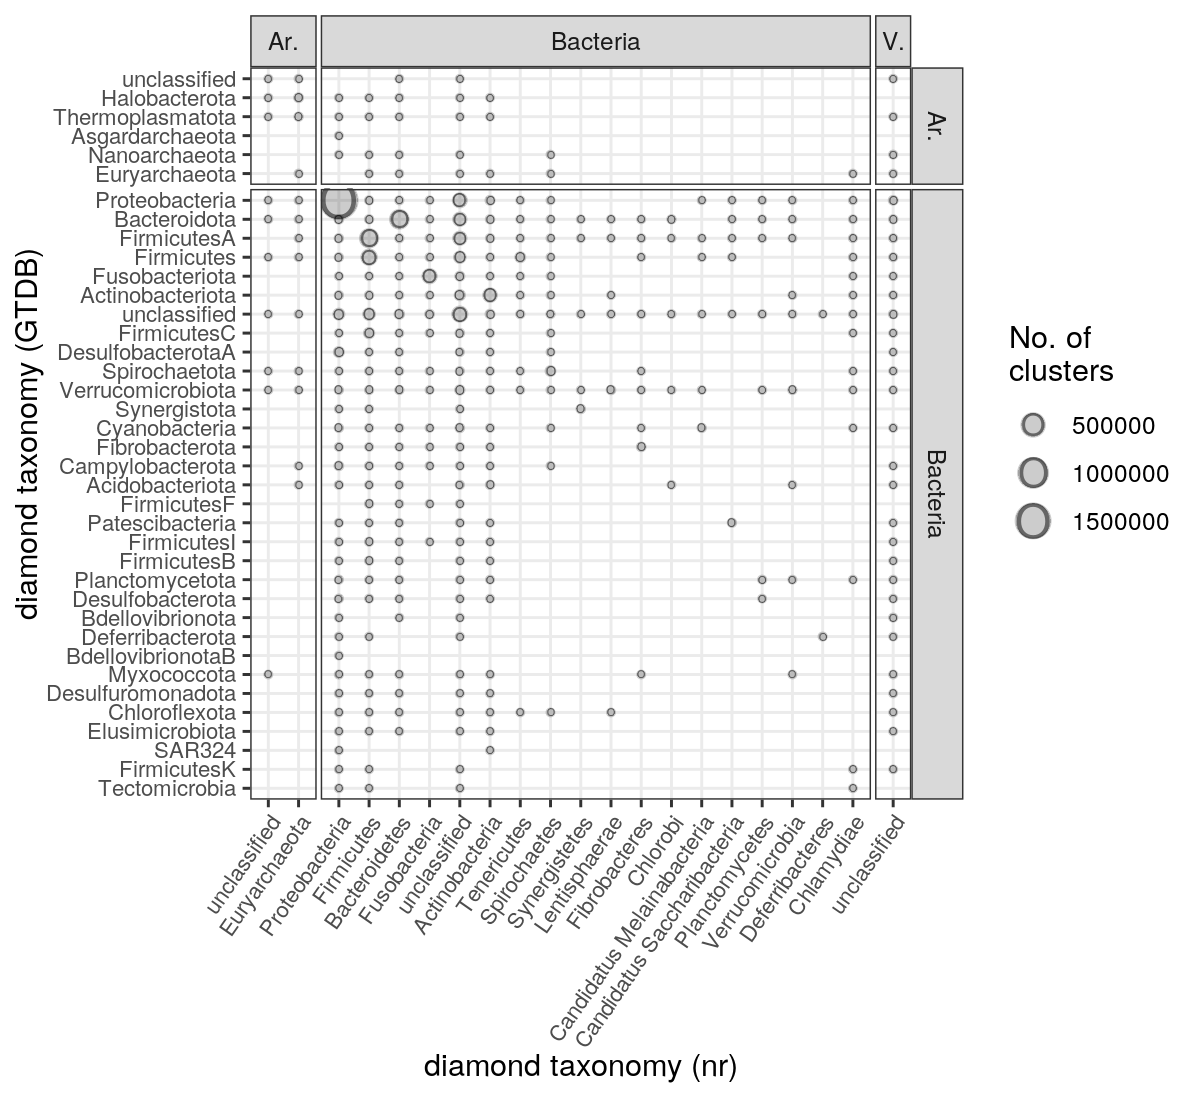

In [96]:
# plotting overlap
p = dmnd_tax_s %>%
    dt_filter(N_by_Phylum >= 100,
              N_by_iPhylum >= 100) %>%
    dt_mutate(Domain = ifelse(Domain == 'Archaea', 'Ar.', Domain),
              Domain = ifelse(Domain == 'Viruses', 'V.', Domain),
              i.Domain = ifelse(i.Domain == 'Archaea', 'Ar.', i.Domain),
              Phylum = Phylum %>% reorder(-N),
              i.Phylum = i.Phylum %>% reorder(N)) %>%
    ggplot(aes(Phylum, i.Phylum, size=N)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('No. of\nclusters') +
    labs(x='diamond taxonomy (nr)', y='diamond taxonomy (GTDB)') +
    facet_grid(i.Domain ~ Domain, scales='free', space='free') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1, size=8),
        axis.text.y = element_text(size=8),
        panel.spacing = unit(0.1, "lines")
    )

p.dims(6,5.5)
plot(p)

In [100]:
# summarizing by both taxonomies (microbial); strict e-value cutoff
evalue_cutoff = 1e-20
to_keep = c('Archaea', 'Bacteria', 'Viruses')
dmnd_tax_s = dmnd_tax %>%
    dt_filter(evalue <= evalue_cutoff,
              i.evalue <= evalue_cutoff) %>%
    dt_mutate(Phylum = ifelse(Phylum == '' | is.na(Phylum), 'unclassified', Phylum),
              i.Phylum = ifelse(i.Phylum == '' | is.na(i.Phylum), 'unclassified', i.Phylum)) %>%
    dt_mutate(N_by_Phylum = n_distinct(query), by=list(Phylum)) %>%
    dt_mutate(N_by_iPhylum = n_distinct(query), by=list(i.Phylum)) %>%
    dt_filter(Domain %in% to_keep,
              i.Domain %in% to_keep) %>%
    dt_count(by=list(Domain, Phylum, i.Domain, i.Phylum, N_by_Phylum, N_by_iPhylum))

dmnd_tax_s

Domain   Phylum          i.Domain i.Phylum       N_by_Phylum N_by_iPhylum
1   Bacteria unclassified    Bacteria Proteobacteria 2900329     1837936     
2   Bacteria Proteobacteria  Bacteria Proteobacteria 1711717     1837936     
⋮   ⋮        ⋮               ⋮        ⋮              ⋮           ⋮           
362 Bacteria unclassified    Bacteria Omnitrophota   2900329          1      
363 Bacteria Armatimonadetes Bacteria Bacteroidota        13     260300      
    N      
1     75235
2   1660714
⋮   ⋮      
362 1      
363 1

In [101]:
# plotting overlap
p = dmnd_tax_s %>%
    dt_filter(N_by_Phylum >= 100,
              N_by_iPhylum >= 100) %>%
    dt_mutate(Domain = ifelse(Domain == 'Archaea', 'Ar.', Domain),
              Domain = ifelse(Domain == 'Viruses', 'V.', Domain),
              i.Domain = ifelse(i.Domain == 'Archaea', 'Ar.', i.Domain),
              Phylum = Phylum %>% reorder(-N),
              i.Phylum = i.Phylum %>% reorder(N)) %>%
    ggplot(aes(Phylum, i.Phylum, size=N)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('No. of\nclusters') +
    labs(x='diamond taxonomy (nr)', y='diamond taxonomy (GTDB)') +
    facet_grid(i.Domain ~ Domain, scales='free', space='free') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1, size=8),
        axis.text.y = element_text(size=8),
        panel.spacing = unit(0.1, "lines")
    )

p.dims(6,5.5)
plot(p)

# sessionInfo

In [222]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/tidyverse/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.3 tidytable_0.3.2   dtplyr_1.0.0      data.table_1.12.8
[5] ggplot2_3.2.1     tidyr_1.0.0       dplyr_0.8.3      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3       plyr_1.8.5       pillar_1.4.3     compiler_3.6.2  
 [5] base64enc_0.1-3  tools_3.6